<header style="padding:10px;background:#f9f9f9;border-top:3px solid #00b2b1"><img id="Teradata-logo" src="https://www.teradata.com/Teradata/Images/Rebrand/Teradata_logo-two_color.png" alt="Teradata" width="220" align="right" />

# Vantage Analytic Library and teradataml Demo Notebook  

</header>

This notebook shows the power of Vantage and the Analytic Library through a series of functions that use the Teradata SQLE to perform descriptive statistics, data engineering and transformation, model building, model evaluation and model scoring.  All Analytic Library functions are called through Python using the teradataml interfaces for VAL.  Once the heavy lifting is done by the SQL engine, Python (Matplotlib and plotly) are used to generate the plots herein.  The analyses that are used include the following.  The overall use case is also summarized below.

##  Analytic Library and teradataml Demo Use Case

### Demo data - Financial Customers/Accounts/Transactions

The following data has been put into the AOA_DEMO database on Transcend for the examples in this Python  Notebook.  Its a simplistic ficticious dataset of banking customers (10K-ish rows), Accounts (20K-ish rows) and Transactions (1M-ish rows).  They are related to each other in the following ways:

![TWMDemoDataModel](img/DemoData.png)

Within this use case, we explore the raw data using the VAL Descriptive Statistical functions along with many different plots and graphs.  Based upon our findings, we begin to assemble an analytic data set through a combination of VAL Transformation functions, as well as the pandas/SQLAlchemy support in teradataml.  Finally, we use Logistic Regression to predict which of our existing customer base has the highest propensity to open up a credit card account.

###  Descriptive Statistics

#### Values Analysis
    
- Data Types
- Count
- Number NULLs, Positive, Negative and Unique, Zero and Blank values

#### Univariate Statistical Analysis
- Count/Minimum/Maximum/Mean
- Standard Deviation
- Standard Mean Error
- Variance & Coefficient of Variance
- Skewness & Kurtosis 
- Uncorrected Sum of Squares
- Corrected Sum of Squares
- Modes
- Quantiling & Ranking
    - Top 10/Bottom 10 Percentiles*
    - Deciles/Quartiles/Tertiles*
    - Top 5/Bottom 5 Ranks and Values*

#### Distribution Analysis

##### Frequency of Discrete Variables

| Style | Description |
| --- | --- |
| basic | Counts frequencies of individual column values (default). |
| pairwise | Counts frequencies of pair-wise combinations of values of selected columns rather than individually. Not available if the cumulative option is selected. |
| crosstab | Counts frequencies of combinations of values of selected columns rather than individually. |

##### Histograms of Continuous Variables

| Option | Description/Example |
| --- | --- |
| bins | The number of equal width bins to create. |
| | For example, bins=5. If multiple columns are requested, multiple bin sizes may be specified, such as bins=5, 10. If fewer sizes are specified than columns, left-over columns are associated with the default size of 10 bins. |
| widths | The width of the bins to create. |
| | For example, widths=100. If multiple columns are requested, multiple widths must be specified, such as widths=5, 10. If fewer sizes are specified than columns, an error message displays. |
| quantiles | The number of approximately equally populated bins to create. |
| | For example, quantiles=10. If multiple columns are requested, multiple quantile sizes may be specified, such as quantiles=5, 10. If fewer sizes are specified than columns, left-over columns are associated with the default size of 10 quantiles. |
| boundaries | Specific boundaries that define the bins. |
| | For example, boundaries=0,50,100,150 provides 3 bins between 0 and 150 (0 to 50, 50 to 100, and 100 to 150). If multiple columns are requested, multiple sets of parameters must be specified, such as boundaries={0, 50000, 100000, 150000}, {0, 50, 100}. |
| binwithminmax | The number of bins spanning a range specified by the minimum and maximum values. |
| | For example, binwithminmax=5,0,200 creates 5 bins ranging from 0 to 200. If multiple columns are requested, multiple sets of parameters must be specified, such as binwithminmax={10, 0, 200000}, {5, 0, 100}.|

A seperate (Adaptive Histogram) analysis is offered to intelligently bin data by offering options to further subdivide the distribution. 

#### Matrix Analysis
- reate a matrix for input to Linear Regression (or Factor Analysis in the next release) or analysis of any of the following types of matrices:
    - SSCP = sum-of-squares-and-cross-products matrix (the default)
    - ESSCP = Extended-sum-of-squares-and-cross-products matrix
    - CSSCP = Corrected-sum-of-squares-and-cross-products matrix
    - COV = Covariance matrix
    - COR = Correlation matrix

### Variable Transformation Functions

The Variable Transformation analysis reads a single table or view and produces a Select, Create Table, or Create View statement containing transformed columns.  Each function below can be called individually or in any combination. 

#### Bin Coding

Bin Coding replaces a continuous numeric column with a categorical one and produce ordinal values (for example, numeric categorical values where order is meaningful). Bin Coding uses the same techniques used in Histogram analysis, allowing you to choose between equal-width bins, equal-width bins with a user-specified minimum and maximum range, bins with a user-specified width, evenly distributed bins, or bins with user-specified boundaries.

#### Design Coding

Design Coding is useful when a categorical data element must be re-expressed as one or more numeric data elements, creating a binary numeric field for each categorical data value. Design coding is offered in two forms: dummy-coding and contrast-coding.

#### Recoding

Recoding a categorical data column is done to re-express existing values of a column (variable) into a new coding scheme or to correct data quality problems and focus an analysis on a particular value. It allows for mapping individual values, NULL values, or any number of remaining values (ELSE option) to a new value, a NULL value or the same value.

#### Rescaling

Rescaling limits the upper and lower boundaries of the data in a continuous numeric column using a linear rescaling function based on maximum and minimum data values. Rescale is useful with algorithms that require or work better with data within a certain range.

#### Sigmoid Transformation

A Sigmoid transformation provides rescaling of continuous numeric data in a more sophisticated way than the Rescaling transformation function. In a Sigmoid transformation a numeric column is transformed using a type of sigmoid or s-shaped function. 

#### Z-Score Transformation

Similar to a Sigmoid transformation, a Z-Score transformation provides rescaling of continuous numeric data in a more sophisticated way than a Rescaling transformation.  Z-Score transforms each column value into the number of standard deviations from the mean value of the column.

#### NULL Value Replacement

NULL value replacement is offered as a transformation function. A literal value, the mean, median, mode, or an imputed value joined from another table can be used as the replacement value. The median value can be requested with or without averaging of two middle values when there is an even number of values.

#### Formula Derivations

The Derive transformation requires the free-form transformation be specified as a formula using the following operators, arguments, and functions:  +, -, **, *, /, %, (, ), x, y, z, abs, exp, ln, log, sqrt

### Logistic Regression

Logistic Regression is one of the most widely used types of statistical analysis.  In Logistic Regression, a set of independent variables (in this case columns) is processed to predict the value of a dependent variable (column) that assumes two values referred to as response (1) and non-response (0).  Actually, the user specifies what value of the dependent variable to treat as the response, and all other values assumed by the depedent variable are treated as non-repsonse.  The result is not however a continuous numeric variable as seen in Linear Regression, but rather a probability between 0 and 1 that the response value is assumed by the dependent variable.  teradataml splits separate function out for model building, evaluation and scoring.

In [12]:
# Load teradataml and dependency packages

from teradataml import create_context, DataFrame, get_context, copy_to_sql, in_schema, remove_context
from teradataml.dataframe.sql_functions import case
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import getpass as gp
from sqlalchemy.sql.expression import select, or_, extract, text, join, case as case_when
from sqlalchemy import func

# Import "valib" object from teradataml to execute Vantage Analytic Library functions.
# Set 'configure.val_install_location' to the database name where Vantage analytic library functions are installed.

from teradataml import *
from teradataml.analytics.valib import *
from teradataml import configure
configure.val_install_location = "VAL"

#from pycaret.utils import enable_colab
#enable_colab()

import xml.dom.minidom

import pylab

In [3]:
%matplotlib inline

# define matplotlib styles for this notebook
plt.style.use('fivethirtyeight')
pylab.rcParams['figure.figsize'] = (20, 6)
pylab.rcParams['font.size'] = 16
pylab.rcParams['text.color'] = 'black'
pylab.rcParams['axes.labelcolor'] = 'black'
pylab.rcParams['xtick.color'] =  'black'
pylab.rcParams['ytick.color'] =  'black'  
pylab.rcParams['ytick.labelsize'] = 'large'

#pylab.rcParams.keys() 

## Connection

In [4]:
td_context = create_context(host="3.238.151.85", username="AOA_DEMO", password=gp.getpass(prompt='Password:'))

Password: ··········


In [7]:
# Create DataFrames for the Customer, Accounts and Transactions tables in the
# Vantage Advanced SQL Engine. 
tdCustomer = DataFrame("bank_customer")

# Using to_pandas() for a cleaner display format
tdCustomer.to_pandas().head(10)

income  age  years_with_bank  nbr_children gender marital_status  \
cust_id                                                                       
25902814   2959.4   51                8             0      F              1   
23175148  14354.8   39                5             2      F              2   
28620753      0.0   16                8             1      M              1   
24526440  52853.4   38                6             5      F              4   
27259000  23870.0   60                2             0      F              2   
25897247    842.6   70                7             0      F              2   
24532272  34003.8   71                9             2      M              3   
17715126  25725.7   35               12             2      M              1   
24535494  40824.0   66                4             2      M              1   
25891680   3573.1   24                6             0      M              1   

         postal_code state_code  
cust_id                          
25902814       94299         CA  
23175148       37232         TN  
28620753       97248         OR  
24526440       94293         CA  
27259000       40564         KY  
25897247       10101         NY  
24532272       46227         IN  
17715126       40218         KY  
24535494       33249         FL  
25891680       60665         IL

In [8]:
tdAccounts = DataFrame("bank_accounts")
# Using to_pandas() for a cleaner display format
tdAccounts.to_pandas().head(10)

cust_id acct_type account_active acct_start_date  \
acct_nbr                                                                
456114321362917423  31347091        CC              Y      1995-12-13   
000000001363158310  13631580        SV              Y      1995-07-06   
000000001362897221  28620837        CK              Y      1995-08-01   
456114321362580422  29976760        CC              Y      1992-03-30   
456114321363364415  20450460        CC              N      1989-11-23   
000000001362630217  23164710        CK              Y      1991-03-12   
456114321363303415  20449545        CC              Y      1995-04-22   
000000001362613317  23164421        SV              Y      1995-12-30   
000000001363429212  16361148        CK              Y      1994-09-30   
000000001363022319  25897418        SV              Y      1995-01-16   

                   starting_balance ending_balance  
acct_nbr                                            
456114321362917423           11.000       6890.000  
000000001363158310         1470.562       8629.740  
000000001362897221          173.120         11.330  
456114321362580422          493.856      13650.000  
456114321363364415         4816.422       9108.447  
000000001362630217         2799.050        396.025  
456114321363303415            0.000       5100.000  
000000001362613317          255.650       1050.838  
000000001363429212          354.324        629.391  
000000001363022319          620.820        434.000

In [10]:
tdTransactions = DataFrame("bank_transactions")
# Using to_pandas() for a cleaner display format
tdTransactions.to_pandas().head(10)

tran_amt principal_amt interest_amt new_balance  \
tran_id acct_nbr                                                             
594     456114321363210418  -135.29       -541.16        0.000     -317.45   
22      456114321362609422  -158.10       -149.10        0.000    -1933.17   
480     000000001362513320     0.12          0.00        4.120       96.70   
120     456114321362584415   369.44       1847.20        5.000     -335.97   
297     456114321362664411   -60.59       -727.08        0.000     -671.10   
913     000000001363217211   713.18       8558.16        0.000     1299.76   
375     000000001363109215  -231.97      -1159.85        5.000     1020.35   
300     000000001362767315   177.00        885.00        5.000      978.99   
817     456114321362749419    -2.99         75.01        0.000    -3000.00   
1050    000000001362924221     0.00          9.00        0.000      863.65   

                             tran_date  tran_time channel tran_code  
tran_id acct_nbr                                                     
594     456114321363210418  1995-11-18     132841       E        CG  
22      456114321362609422  1995-01-03     180048       E        CG  
480     000000001362513320  1995-11-30     235959    None        IN  
120     456114321362584415  1995-10-07          0       M        PM  
297     456114321362664411  1995-11-10      55613       E        CG  
913     000000001363217211  1995-05-19     140816       E        DP  
375     000000001363109215  1995-01-14     124137       A        TR  
300     000000001362767315  1995-09-28     212551       A        DP  
817     456114321362749419  1995-11-30     183734       E        CG  
1050    000000001362924221  1995-09-20      21020       A        IQ

## Values Function:

### SIGNATURE:
> valib.Values(data, columns=None, exclude_columns=None, group_columns=None, distinct=False, filter=None)

### DESCRIPTION:
Use Values analysis as the first type of analysis performed on unknown data. Values analysis determines the nature and quality of the data. For example, whether the data is categorical or continuously numeric, how many null values it contains, and so on. 
A Values analysis provides a count of rows, rows with non-null values, rows with null values, rows with value 0, rows with a positive value, rows with a negative value, and the number of rows containing blanks in the given column. By default, unique values are counted, but this calculation can be inhibited for performance reasons if desired. 
For a column of non-numeric type, the zero, positive, and negative counts are always zero (for example, 000 is not counted as 0). A Values analysis can be performed on columns of any data type, though the measures displayed vary according to column type. 

### PARAMETERS:

#### data:
Required Argument.
Specifies the input data to perform Values analysis.
Types: teradataml DataFrame

#### columns:
Required Argument.
Specifies the name(s) of the column(s) to analyze. Occasionally, it can also accept permitted strings to specify all columns, or all numeric columns, or all character columns.
Permitted Values:
- Name(s) of the column(s) in "data".
- Pre-defined strings: 
    - 'all' – all columns
    - 'allnumeric' – all numeric columns
    - 'allcharacter' - all numeric and date columns

Types: str OR list of Strings (str)

#### exclude_columns:
Optional Argument.
Specifies the name(s) of the column(s) to exclude from the analysis, if a column specifier such as 'all', 'allnumeric', 'allcharacter' is used in the "columns" argument.

Types: str OR list of Strings (str)

#### group_columns:
Optional Argument.
Specifies the name(s) of column(s) to perform separate analysis for each group.

Types: str OR list of Strings (str)

#### distinct:
Optional Argument.
Specifies whether to select unique values count for each selected column.
Default Value: False

Types: bool

#### filter:
Optional Argument.
Specifies the clause to filter rows selected for analysis within Values.
For example,
    filter = "cust_id > 0"

Types: str

### RETURNS:
An instance of Values.
Output teradataml DataFrames can be accessed using attribute references, such as ValuesObj.<attribute_name>.
Output teradataml DataFrame attribute name is: result.

### RAISES:
TeradataMlException, TypeError, ValueError

In [7]:
# Example 1: Perform Values analysis using default values on 'income' and 'marital_status' columns.
tdCustomer_val1 = valib.Values(data=tdCustomer, columns=["all"])
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_val1.result.to_pandas().head(10)

xtype     xcnt  \
xdb      xtbl     xcol                                                       
TRNG_XSP Customer marital_status   VARCHAR(1) CHARACTER SET LATIN  10458.0   
                  age                                     INTEGER  10458.0   
                  state_code       VARCHAR(2) CHARACTER SET LATIN  10458.0   
                  gender           VARCHAR(1) CHARACTER SET LATIN  10458.0   
                  cust_id                                 INTEGER  10458.0   
                  income                            DECIMAL(15,1)  10458.0   
                  postal_code      VARCHAR(5) CHARACTER SET LATIN  10458.0   
                  years_with_bank                         INTEGER  10458.0   
                  nbr_children                            INTEGER  10458.0   

                                   xnull  xunique  xblank   xzero     xpos  \
xdb      xtbl     xcol                                                       
TRNG_XSP Customer marital_status     0.0      4.0     0.0     NaN      NaN   
                  age                0.0     86.0     NaN     0.0  10458.0   
                  state_code         0.0     33.0     0.0     NaN      NaN   
                  gender             0.0      2.0     0.0     NaN      NaN   
                  cust_id            0.0  10458.0     NaN     0.0  10458.0   
                  income             0.0   8253.0     NaN  1428.0   9030.0   
                  postal_code        0.0    442.0     0.0     NaN      NaN   
                  years_with_bank    0.0     15.0     NaN   176.0  10282.0   
                  nbr_children       0.0      9.0     NaN  2330.0   8128.0   

                                   xneg  
xdb      xtbl     xcol                   
TRNG_XSP Customer marital_status    NaN  
                  age               0.0  
                  state_code        NaN  
                  gender            NaN  
                  cust_id           0.0  
                  income            0.0  
                  postal_code       NaN  
                  years_with_bank   0.0  
                  nbr_children      0.0

### Plots

#### Bar Chart - Unique Values

In [8]:
# Remove Index from Values plots data
tdCustomer_bar_pd = tdCustomer_val1.result.to_pandas().reset_index()

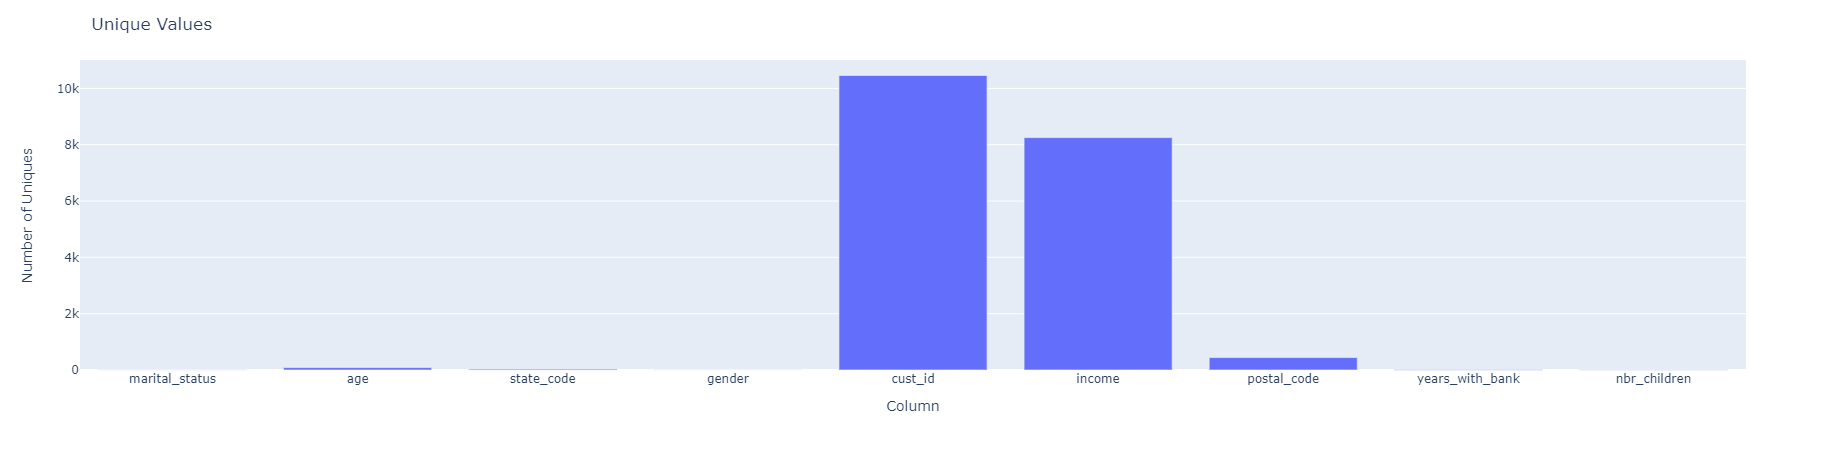

In [9]:
fig = px.bar(tdCustomer_bar_pd, x='xcol', y=["xunique"])
fig.update_layout(height=450, width=1100, title="Unique Values")
fig.update_xaxes(tickangle = 0, title="Column")   
fig.update_yaxes(title="Number of Uniques")   
fig.update_layout(showlegend=False)
fig

#### Stacked Bar Chart - Count, NULL, Unique, Blank, Zero, Positive and Negative Values

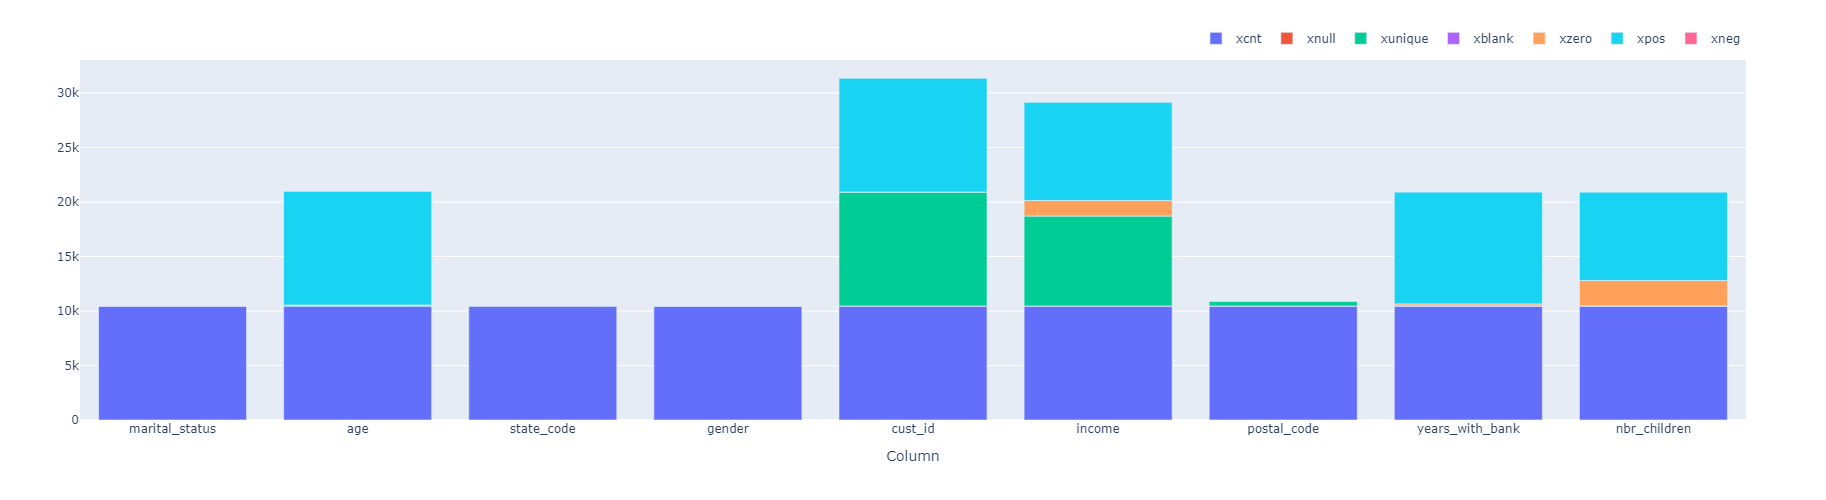

In [10]:
fig = px.bar(tdCustomer_bar_pd, x='xcol', y=["xcnt", "xnull", "xunique","xblank","xzero","xpos","xneg"])
fig.update_layout(height=500, width=1000)
fig.update_xaxes(tickangle = 0, title="Column")   
fig.update_yaxes(title="")   
fig.update_layout(legend=dict(
    title="",
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.show() 

#### Horizontal Bar Chart - Count, NULL, Unique, Blank, Zero, Positive and Negative Values

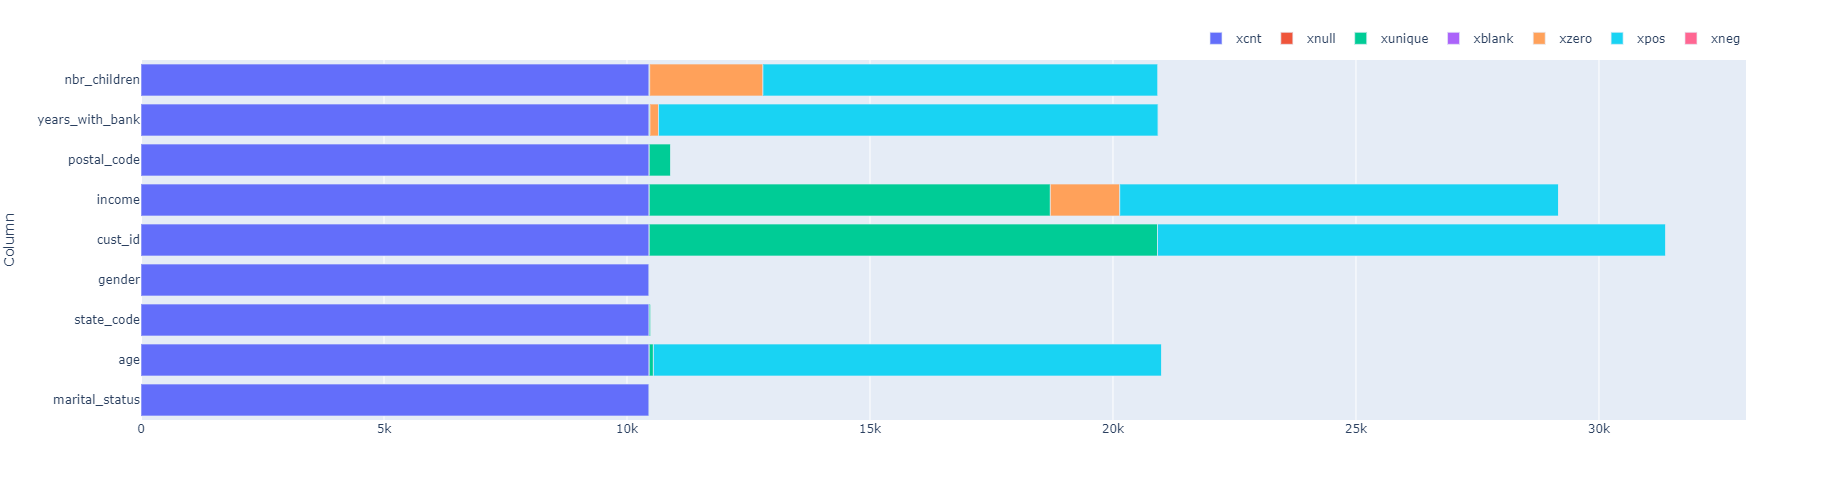

In [11]:
fig = px.bar(tdCustomer_bar_pd, x=["xcnt", "xnull", "xunique","xblank","xzero","xpos","xneg"], y='xcol')
fig.update_layout(height=500)
fig.update_yaxes(title="Column")   
fig.update_xaxes(title="") 
fig.update_layout(legend=dict(
    title="",
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show() 

In [12]:
# Example 2: Perform Values analysis on 'income' column with values grouped by 'gender' and only for rows with income greater than 0.
tdCustomer_val2 = valib.Values(data=tdCustomer, columns=["all"], group_columns="gender", filter="income > 0")
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_val2.result.to_pandas().head(20)

xtype  \
gender xdb      xtbl     xcol                                              
F      TRNG_XSP Customer years_with_bank                         INTEGER   
                         marital_status   VARCHAR(1) CHARACTER SET LATIN   
M      TRNG_XSP Customer postal_code      VARCHAR(5) CHARACTER SET LATIN   
                         years_with_bank                         INTEGER   
F      TRNG_XSP Customer income                            DECIMAL(15,1)   
M      TRNG_XSP Customer income                            DECIMAL(15,1)   
F      TRNG_XSP Customer cust_id                                 INTEGER   
M      TRNG_XSP Customer cust_id                                 INTEGER   
                         age                                     INTEGER   
                         nbr_children                            INTEGER   
F      TRNG_XSP Customer state_code       VARCHAR(2) CHARACTER SET LATIN   
                         nbr_children                            INTEGER   
                         age                                     INTEGER   
M      TRNG_XSP Customer state_code       VARCHAR(2) CHARACTER SET LATIN   
                         marital_status   VARCHAR(1) CHARACTER SET LATIN   
F      TRNG_XSP Customer postal_code      VARCHAR(5) CHARACTER SET LATIN   

                                            xcnt  xnull  xunique  xblank  \
gender xdb      xtbl     xcol                                              
F      TRNG_XSP Customer years_with_bank  5054.0    0.0     15.0     NaN   
                         marital_status   5054.0    0.0      4.0     0.0   
M      TRNG_XSP Customer postal_code      3976.0    0.0    265.0     0.0   
                         years_with_bank  3976.0    0.0     15.0     NaN   
F      TRNG_XSP Customer income           5054.0    0.0   4640.0     NaN   
M      TRNG_XSP Customer income           3976.0    0.0   3669.0     NaN   
F      TRNG_XSP Customer cust_id          5054.0    0.0   5054.0     NaN   
M      TRNG_XSP Customer cust_id          3976.0    0.0   3976.0     NaN   
                         age              3976.0    0.0     79.0     NaN   
                         nbr_children     3976.0    0.0      9.0     NaN   
F      TRNG_XSP Customer state_code       5054.0    0.0     33.0     0.0   
                         nbr_children     5054.0    0.0      9.0     NaN   
                         age              5054.0    0.0     81.0     NaN   
M      TRNG_XSP Customer state_code       3976.0    0.0     32.0     0.0   
                         marital_status   3976.0    0.0      4.0     0.0   
F      TRNG_XSP Customer postal_code      5054.0    0.0    326.0     0.0   

                                           xzero    xpos  xneg  
gender xdb      xtbl     xcol                                   
F      TRNG_XSP Customer years_with_bank    92.0  4962.0   0.0  
                         marital_status      NaN     NaN   NaN  
M      TRNG_XSP Customer postal_code         NaN     NaN   NaN  
                         years_with_bank    60.0  3916.0   0.0  
F      TRNG_XSP Customer income              0.0  5054.0   0.0  
M      TRNG_XSP Customer income              0.0  3976.0   0.0  
F      TRNG_XSP Customer cust_id             0.0  5054.0   0.0  
M      TRNG_XSP Customer cust_id             0.0  3976.0   0.0  
                         age                 0.0  3976.0   0.0  
                         nbr_children      805.0  3171.0   0.0  
F      TRNG_XSP Customer state_code          NaN     NaN   NaN  
                         nbr_children     1015.0  4039.0   0.0  
                         age                 0.0  5054.0   0.0  
M      TRNG_XSP Customer state_code          NaN     NaN   NaN  
                         marital_status      NaN     NaN   NaN  
F      TRNG_XSP Customer postal_code         NaN     NaN   NaN

#### 3-D Chart - Unique Values by Gender

In [13]:
def draw_3d_bar(data):
    unique_genders = data.reset_index().gender.unique()
    unique_xcols = data.reset_index()["xcol"].unique()
    x = [[data.at[gender, col] for col in unique_xcols ] for gender in unique_genders]
    result = np.array(x, dtype=np.int)
    fig=plt.figure(figsize=(10, 12), dpi=500)
    ax1=fig.add_subplot(111, projection='3d')    
    xlabels = np.array(unique_xcols)
    xpos = np.arange(xlabels.shape[0])
    ylabels = tdCustomer_bar_pd["gender"].unique()
    ypos = np.arange(ylabels.shape[0])
    xposM, yposM = np.meshgrid(xpos, ypos, copy=False)
    zpos=result
    zpos = zpos.ravel()
    dx=1
    dy=.3
    dz=zpos
    ax1.w_xaxis.set_ticks(xpos )
    ax1.w_xaxis.set_ticklabels(xlabels)
    ax1.w_yaxis.set_ticks(ypos + dy/2.)
    ax1.w_yaxis.set_ticklabels(ylabels)
    values = (dz-dz.min())/np.float_(dz.max()-dz.min())
    colors = cm.rainbow(values)
    ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
    plt.title("Unique Values")
    plt.xticks(rotation=70)
    return plt

For some reason, the following graph no longer works.  If you find a way to make it work, please let Tim Miller know.

In [15]:
# Remove Index from Values plots data
# tdCustomer_bar_pd = tdCustomer_val2.result.to_pandas().reset_index()
# data = tdCustomer_val2.result.to_pandas().reset_index().set_index(["gender", "xcol"])["xunique"]
# draw_3d_bar(data).show()

## Statistics Function

### SIGNATURE:
> valib.Statistics(data, columns=None, exclude_columns=None, extended_options='none', group_columns=None, statistical_method='population', stats_options=None, filter=None)

### DESCRIPTION:
Statistics analysis provides several common and not so common statistical measures for numeric data columns. Extended options include additional analyses and measures such as Values, Modes, Quantiles, and Ranks. Use statistical measures to understand the characteristics and properties of each numeric column, and to look for outlying values and anomalies.
Statistics analysis can be performed on columns of numeric or date data type. For columns of type DATE, statistics other than count, minimum, maximum, and mean are calculated by first converting to the number of days since 1900.

### PARAMETERS:
data:
Required Argument.
Specifies the input data to perform Statistics analysis.
Types: teradataml DataFrame

#### Columns:
Required Argument.
Specifies the name(s) of the column(s) to analyze. Occasionally, it can also accept permitted strings to specify all columns, or all numeric columns, or all numeric and date columns.
Permitted Values: 
- Name(s) of the column(s) in "data".
- Pre-defined strings: 
    - 'all' – all columns
    - 'allnumeric' – all numeric columns
    - 'allnumericanddate' - all numeric and date columns

Types: str OR list of Strings (str)

#### exclude_columns:
Optional Argument.
Specifies the name(s) of the column(s) to exclude from the analysis, if a column specifier such as 'all', 'allnumeric', 'allnumericanddate' is used in the "columns" argument.

Types: str OR list of Strings (str)

#### extended_options:
Optional Argument.
Specifies the extended options for calculating statistics.
Permitted Values: 
- 'all'
- 'none'
- 'modes'
- 'quantiles'
- 'values'
- 'rank'

Default Value: 'none'

Types: str OR list of Strings (str)

#### group_columns:
Optional Argument.
Specifies the name(s) of column(s) to perform separate analysis for each group.

Types: str OR list of Strings (str)

#### statistical_method:
Optional Argument.
Specifies the statistical method.
Permitted Values: 'sample', 'population'
Default Value: 'population'

Types: str

#### stats_options:
Optional Argument.
Specifies the basic statistics to be calculated.
Permitted Values: 
- all
- count (cnt)
- minimum (min)
- maximum (max)
- mean
- standarddeviation (std)
- skewness (skew)
- kurtosis (kurt)
- standarderror (ste)
- coefficientofvariance (cv)
- variance (var)
- sum
- uncorrectedsumofsquares (uss)
- correctedsumofsquares (css)

Default Value: ['cnt', 'min', 'max', 'mean', 'std']

Types: str OR list of Strings (str)

#### filter:
Optional Argument.
Specifies the clause to filter rows selected for analysis within Statistics.
For example,
    filter = "cust_id > 0"

Types: str

### RETURNS:
An instance of Statistics.
Output teradataml DataFrames can be accessed using attribute references, such as StatisticsObj.<attribute_name>.
Output teradataml DataFrame attribute name is: result.

### RAISES:
TeradataMlException, TypeError, ValueError

In [16]:
# Example 1: First call the Statistics function on all numeric and date columns in the Customer table, taking basic statistics (min/max/mean/std).
tdCustomer_stats1 = valib.Statistics(data=tdCustomer, columns="allnumericanddate")
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_stats1.result.to_pandas().head(10)

xcnt        xmin        xmax  \
xdb      xtbl     xcol                                               
TRNG_XSP Customer age              10458.0         9.0        94.0   
                  cust_id          10458.0  13624800.0  31360385.0   
                  income           10458.0         0.0    374808.2   
                  years_with_bank  10458.0         0.0        14.0   
                  nbr_children     10458.0         0.0         8.0   

                                          xmean          xstd  
xdb      xtbl     xcol                                         
TRNG_XSP Customer age              4.433639e+01  1.926538e+01  
                  cust_id          2.248935e+07  5.494394e+06  
                  income           3.006627e+04  3.827622e+04  
                  years_with_bank  5.764773e+00  2.973770e+00  
                  nbr_children     1.786288e+00  1.462653e+00

In [17]:
# Example 2: Next call the Statistics function on the same variables in the Customer table, generating all statistics, including the extended options.
tdCustomer_stats2 = valib.Statistics(data=tdCustomer, columns="allnumericanddate", stats_options="all", extended_options="all")
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_stats2.result.to_pandas().head(10)

xcnt        xmin        xmax  \
xdb      xtbl     xcol                                               
TRNG_XSP Customer age              10458.0         9.0        94.0   
                  cust_id          10458.0  13624800.0  31360385.0   
                  income           10458.0         0.0    374808.2   
                  years_with_bank  10458.0         0.0        14.0   
                  nbr_children     10458.0         0.0         8.0   

                                          xmean          xstd     xskew  \
xdb      xtbl     xcol                                                    
TRNG_XSP Customer age              4.433639e+01  1.926538e+01  0.226521   
                  cust_id          2.248935e+07  5.494394e+06  0.000001   
                  income           3.006627e+04  3.827622e+04  2.511663   
                  years_with_bank  5.764773e+00  2.973770e+00  0.203450   
                  nbr_children     1.786288e+00  1.462653e+00  0.791973   

                                      xkurt          xste         xcv  \
xdb      xtbl     xcol                                                  
TRNG_XSP Customer age             -0.755821      0.188388   43.452740   
                  cust_id         -1.211969  53727.357792   24.431094   
                  income           9.349902    374.286942  127.306171   
                  years_with_bank -0.676731      0.029079   51.585210   
                  nbr_children     0.558117      0.014303   81.882245   

                                           xvar  ...      xmax_5      xmax_4  \
xdb      xtbl     xcol                           ...                           
TRNG_XSP Customer age              3.711548e+02  ...        90.0        91.0   
                  cust_id          3.018837e+13  ...  31360293.0  31360316.0   
                  income           1.465069e+09  ...    331561.1    332404.8   
                  years_with_bank  8.843311e+00  ...        10.0        11.0   
                  nbr_children     2.139353e+00  ...         4.0         5.0   

                                       xmax_3      xmax_2      xmax_1  \
xdb      xtbl     xcol                                                  
TRNG_XSP Customer age                    92.0        93.0        94.0   
                  cust_id          31360339.0  31360362.0  31360385.0   
                  income             335909.6    369912.4    374808.2   
                  years_with_bank        12.0        13.0        14.0   
                  nbr_children            6.0         7.0         8.0   

                                   xmaxcnt_5 xmaxcnt_4  xmaxcnt_3  xmaxcnt_2  \
xdb      xtbl     xcol                                                         
TRNG_XSP Customer age                   17.0      11.0        6.0       12.0   
                  cust_id                1.0       1.0        1.0        1.0   
                  income                 1.0       1.0        1.0        1.0   
                  years_with_bank      613.0     374.0      182.0       45.0   
                  nbr_children         751.0     348.0      114.0       49.0   

                                   xmaxcnt_1  
xdb      xtbl     xcol                        
TRNG_XSP Customer age                    8.0  
                  cust_id                1.0  
                  income                 1.0  
                  years_with_bank       39.0  
                  nbr_children          10.0  

[5 rows x 77 columns]

#### Percentiles Plot

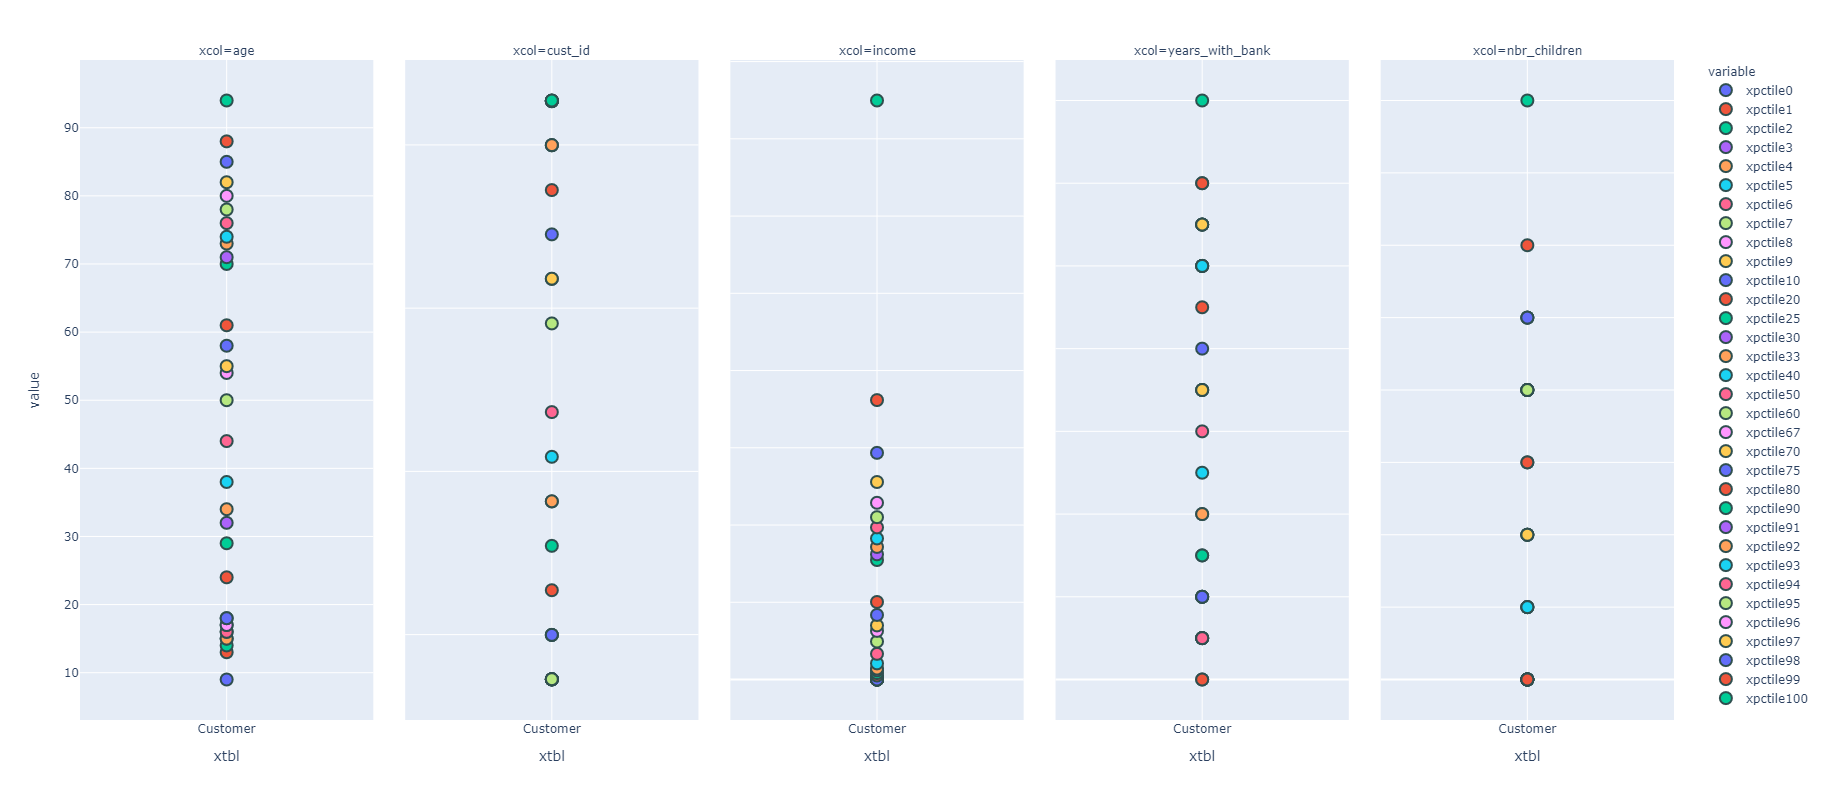

In [18]:
data = tdCustomer_stats2.result.to_pandas().reset_index()
fig = px.scatter(data, facet_col="xcol", x="xtbl",  y= [col for col in data.columns if 'xpctile' in col], height=800)
fig.update_yaxes(matches=None)
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.show()

In [19]:
# Example 3: Next call the Statistics function on the same variables in the Customer table, generating basic statistics, grouping by gender and filtering anyone with an income of 0.
tdCustomer_stats3 = valib.Statistics(data=tdCustomer, columns="allnumericanddate", group_columns="gender", filter="income > 0")
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_stats3.result.to_pandas().head(20)

xcnt        xmin        xmax  \
gender xdb      xtbl     xcol                                              
F      TRNG_XSP Customer years_with_bank  5054.0         0.0        14.0   
M      TRNG_XSP Customer years_with_bank  3976.0         0.0        14.0   
F      TRNG_XSP Customer income           5054.0       297.4    265943.6   
M      TRNG_XSP Customer income           3976.0       197.4    374808.2   
F      TRNG_XSP Customer cust_id          5054.0  13624810.0  31360385.0   
M      TRNG_XSP Customer cust_id          3976.0  13624800.0  31360339.0   
                         age              3976.0        14.0        93.0   
                         nbr_children     3976.0         0.0         8.0   
F      TRNG_XSP Customer nbr_children     5054.0         0.0         8.0   
                         age              5054.0        14.0        94.0   

                                                 xmean          xstd  
gender xdb      xtbl     xcol                                         
F      TRNG_XSP Customer years_with_bank  5.793431e+00  3.023923e+00  
M      TRNG_XSP Customer years_with_bank  5.874748e+00  2.935920e+00  
F      TRNG_XSP Customer income           3.038010e+04  3.277318e+04  
M      TRNG_XSP Customer income           4.046579e+04  4.533547e+04  
F      TRNG_XSP Customer cust_id          2.248928e+07  5.494378e+06  
M      TRNG_XSP Customer cust_id          2.248957e+07  5.494447e+06  
                         age              4.890292e+01  1.739675e+01  
                         nbr_children     1.912978e+00  1.526912e+00  
F      TRNG_XSP Customer nbr_children     1.888603e+00  1.471150e+00  
                         age              4.846379e+01  1.683140e+01

### Plots
#### "Box and Whiskers" by Gender Plot

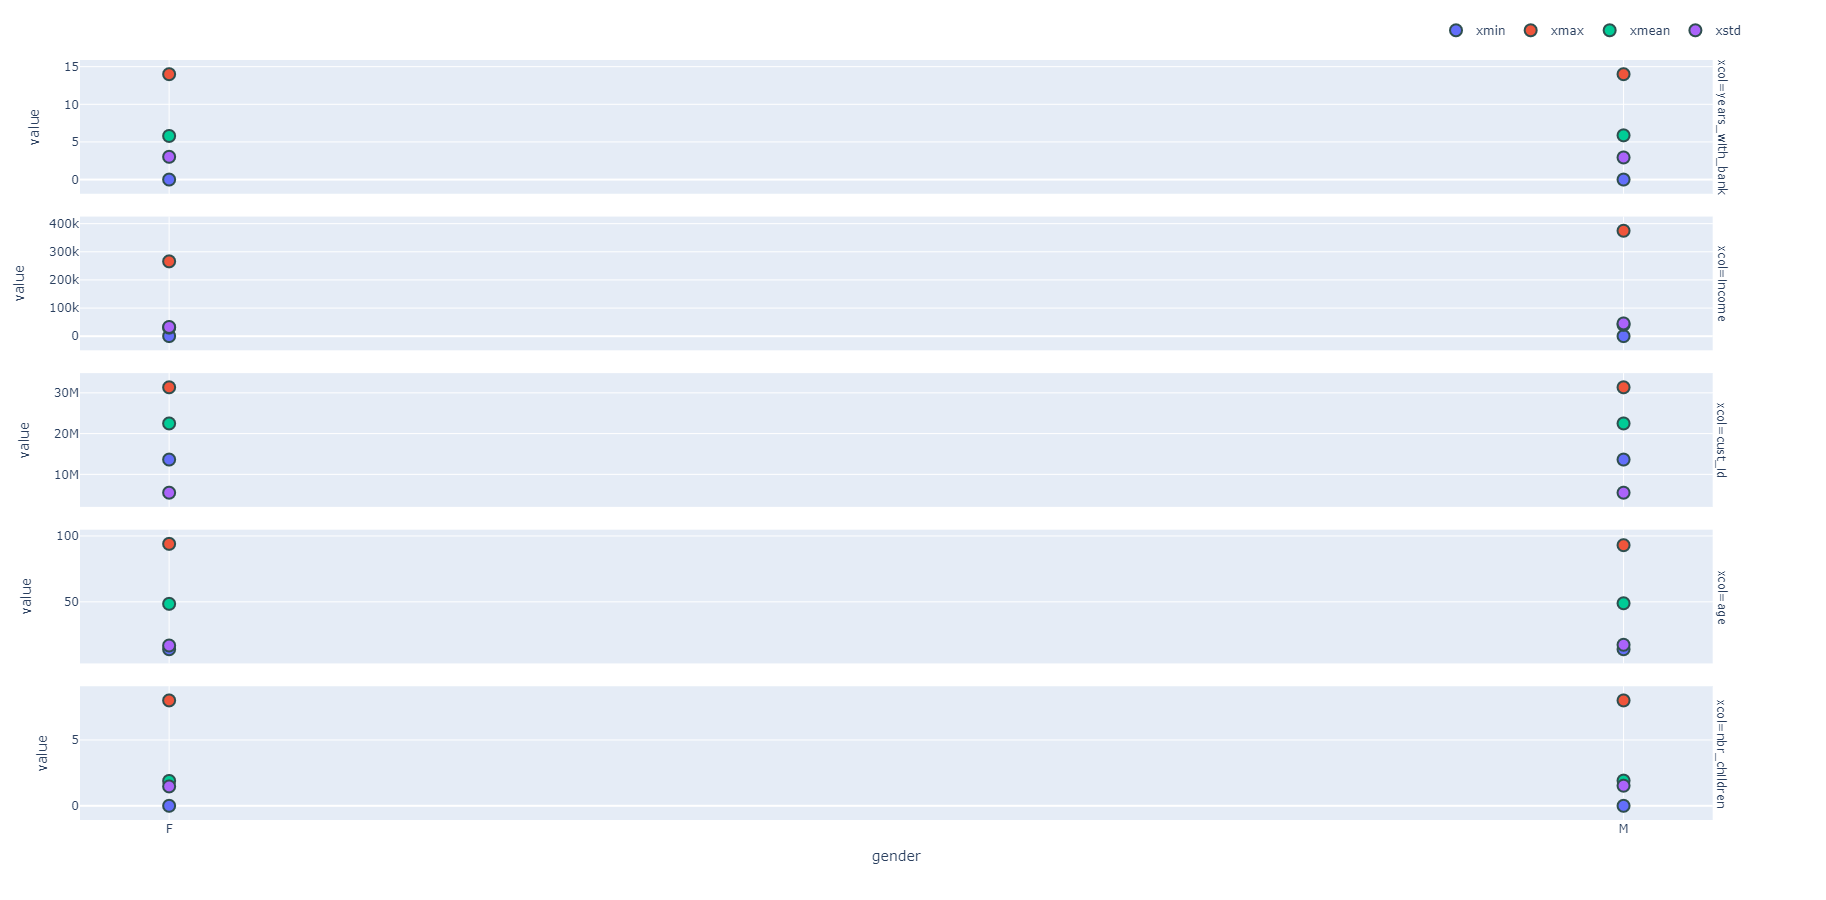

In [20]:
data = tdCustomer_stats3.result.to_pandas().reset_index()
fig = px.scatter(data, facet_row="xcol",  x="gender", y=["xmin","xmax","xmean", "xstd"], height=900)
fig.update_yaxes(matches=None)
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.update_layout(legend=dict(
    title="",
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

## Frequency Function

### SIGNATURE:
> valib.Frequency(data, columns=None, exclude_columns=None, cumulative_option=False, agg_filter=None, min_percentage=None, pairwise_columns=None, stats_columns=None, style="basic", top_n=None, filter=None)

### DESCRIPTION:
Frequency analysis counts the occurrences of individual data values in columns that contain categorical data. Frequency analysis is useful in understanding the meaning of a particular data element and can point out the need to recode some of the data values found, either permanently or in the course of building an analytic data set. This function is also useful in analyzing combinations of values occurring in two or more columns. 
A Frequency analysis calculates the number of occurrences of each value of the column or columns individually or in combination. Additionally, for each value, the percentage of rows in the selected DataFrame is provided in descending order starting with the most frequently occurring value. 

### PARAMETERS:
data:
Required Argument.
Specifies the input data to perform frequency analysis.
Types: teradataml DataFrame

#### columns:
Required Argument.
Specifies the name(s) of the column(s) to analyze. Occasionally, it can also accept permitted strings to specify all columns, or all numeric columns, or all character columns.
Permitted Values: 
- Name(s) of the column(s) in "data".
- Pre-defined strings: 
    - 'all' – all columns
    - 'allnumeric' – all numeric columns
    - 'allcharacter' - all numeric and date columns

Types: str OR list of Strings (str)

#### exclude_columns:
Optional Argument.
Specifies the name(s) of the column(s) to exclude from the analysis, if a column specifier such as 'all', 'allnumeric', 'allcharacter' is used in the "columns" argument.

Types: str OR list of Strings (str)

#### cumulative_option:
Optional Argument.
Specifies whether to include rank, cumulative count, and cumulative percent information for each frequency value. When set to 'True', this information is included otherwise not.
Note:
    This argument should not be set to 'True' when style is 'pairwise'.
Default Value: False

Types: bool

#### agg_filter:
Optional Argument.
Specifies the clause to restrict returned aggregations.
For example,
    agg_filter="xpct > 1"
Note:
    This argument should not be used when "min_percentage" argument is used.

Types: str

#### min_percentage:
Optional Argument.
Specifies a value to determine whether to include only frequency values that occur a minimum percentage of the time. Setting this to 0 or 0.0 is equivalent to not including the argument at all. 

Types: float, int

#### pairwise_columns:
Optional Argument.
Specified the columns to be paired up with the frequency columns.
Note:
    Use only when "style" is set to 'pariwise'.

Types: str OR list of Strings (str)

#### stats_columns:
Optional Argument.
Specifies the name(s) of column(s) for which the minimum, maximum, mean value, and standard deviation are included in the result with the values computed over the rows corresponding to the individual values of the frequency columns.
Note:
    This argument can be used only when "style" is 'basic'.

Types: str OR list of Strings (str)

#### style:
Optional Argument.
Specifies the frequency style for the analysis.
Permitted Values:
- 'basic' - Counts frequencies of individual column values.
- 'pairwise' - Counts frequencies of pair-wise combinations of values of selected columns rather than individually. This should not be used when "cumulative_option" is set to 'True'.
- 'crosstab' - Counts frequencies of combinations of values of selected columns rather than individually.

Default Value: 'basic'

Types: str

#### top_n:
Optional Argument.
Specifies the number of frequency values to include. Using this argument shows frequency only for the number of top occurring values entered. 
Note:
    This argument is enabled only if "cumulative_option" is set to 'True'.

Types: int

#### filter:
Optional Argument.
Specifies the clause to filter rows selected for analysis within Frequency.
For example,
    filter = "cust_id > 0"

Types: str

### RETURNS:
An instance of Frequency.
Output teradataml DataFrames can be accessed using attribute references, such as FrequencyObj.<attribute_name>.
Output teradataml DataFrame attribute name is: result.

### RAISES:
TeradataMlException, TypeError, ValueError

In [21]:
# Example 1: First call the Frequency function on the years_with_bank column in the Customer table.
tdCustomer_freq1 = valib.Frequency(data=tdCustomer, columns="years_with_bank")
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_freq1.result.to_pandas().head(20)

xcnt       xpct
xtbl     xcol            xval                   
Customer years_with_bank 10     613.0   5.861541
                         7     1118.0  10.690381
                         9      845.0   8.079939
                         13      45.0   0.430293
                         12     182.0   1.740295
                         8     1014.0   9.695927
                         4     1137.0  10.872060
                         5     1190.0  11.378849
                         1      526.0   5.029642
                         11     374.0   3.576210
                         2      888.0   8.491107
                         0      176.0   1.682922
                         6     1151.0  11.005928
                         3     1160.0  11.091987
                         14      39.0   0.372920

### Box Plot - Number of years with the financial institution

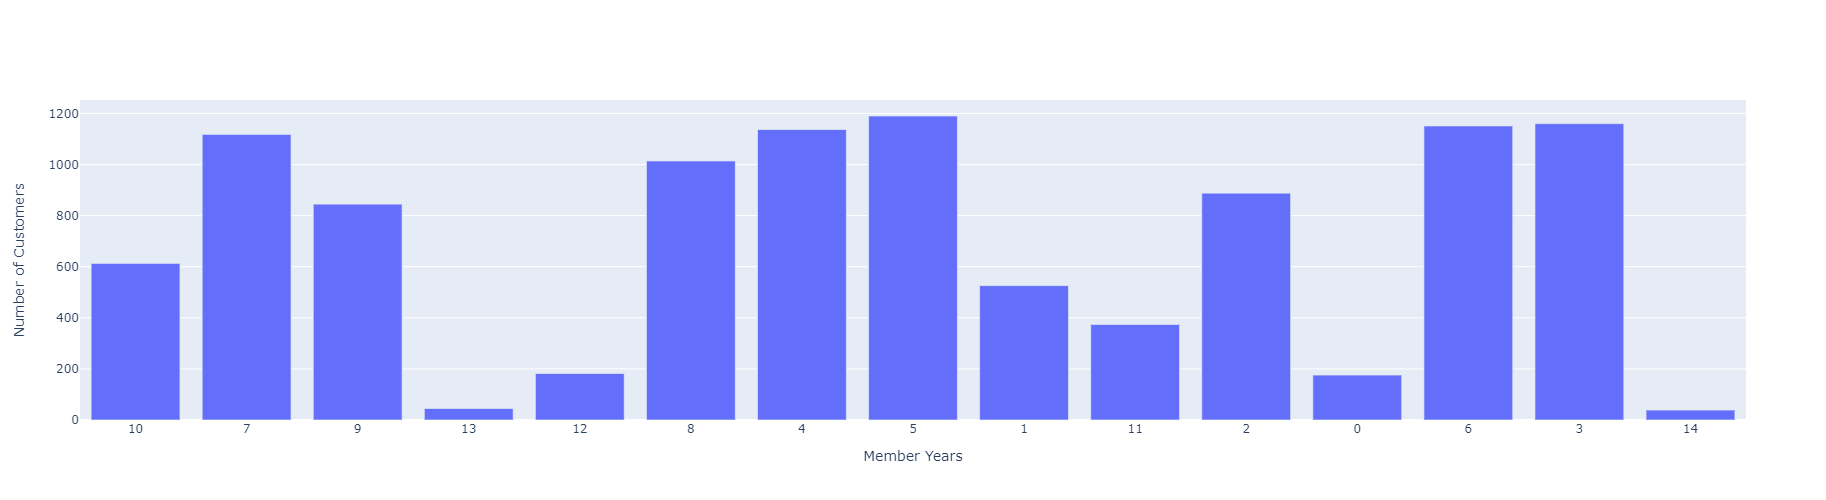

In [22]:
import plotly.graph_objs as go

data = tdCustomer_freq1.result.to_pandas().reset_index()

fig = go.Figure(data=[go.Bar(x=data.xval, y=data.xcnt)])
fig.update_layout(height=500)
fig.update_yaxes(title="Number of Customers")
fig.update_xaxes(title="Member Years", dtick=1)
fig.update_layout(showlegend=False)
fig.show() 

In [23]:
# Example 2: Next call the Frequency function on the gender and marital_status columns in the Customer table, generating a cross-tabulation.
tdCustomer_freq2 = valib.Frequency(data=tdCustomer, columns=["gender", "marital_status"], style="crosstab")
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_freq2.result.to_pandas().head(20)

xcnt       xpct
gender marital_status                   
F      4                560.0   5.354752
       1               2226.0  21.285141
M      4                420.0   4.016064
       1               1638.0  15.662651
F      2               2646.0  25.301205
M      3                252.0   2.409639
       2               2296.0  21.954485
F      3                420.0   4.016064

### Box Plot - Gender by Marital Status

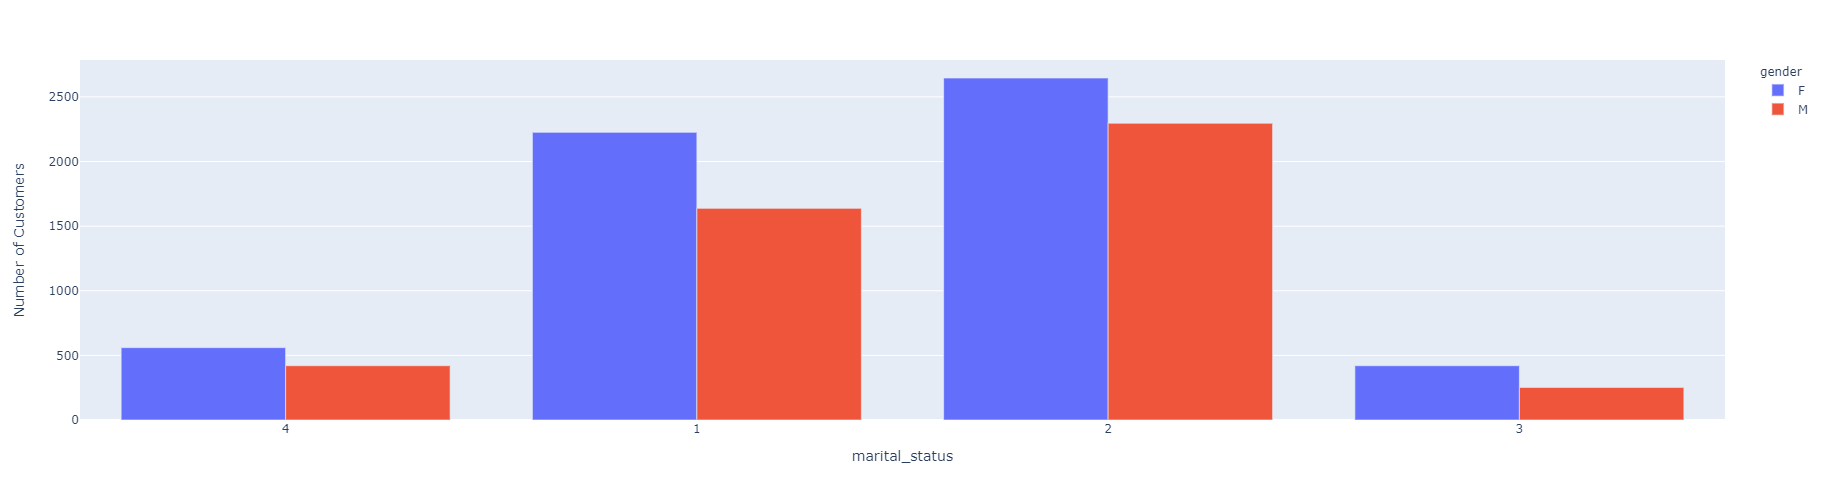

In [24]:
data = tdCustomer_freq2.result.to_pandas().reset_index()
# get center and width
fig = px.bar(data, x="marital_status", y="xcnt",
             color='gender', barmode='group',
             height=500)

fig.update_yaxes(title="Number of Customers")

fig.show()

### Box Plot - Marital Status by Gender

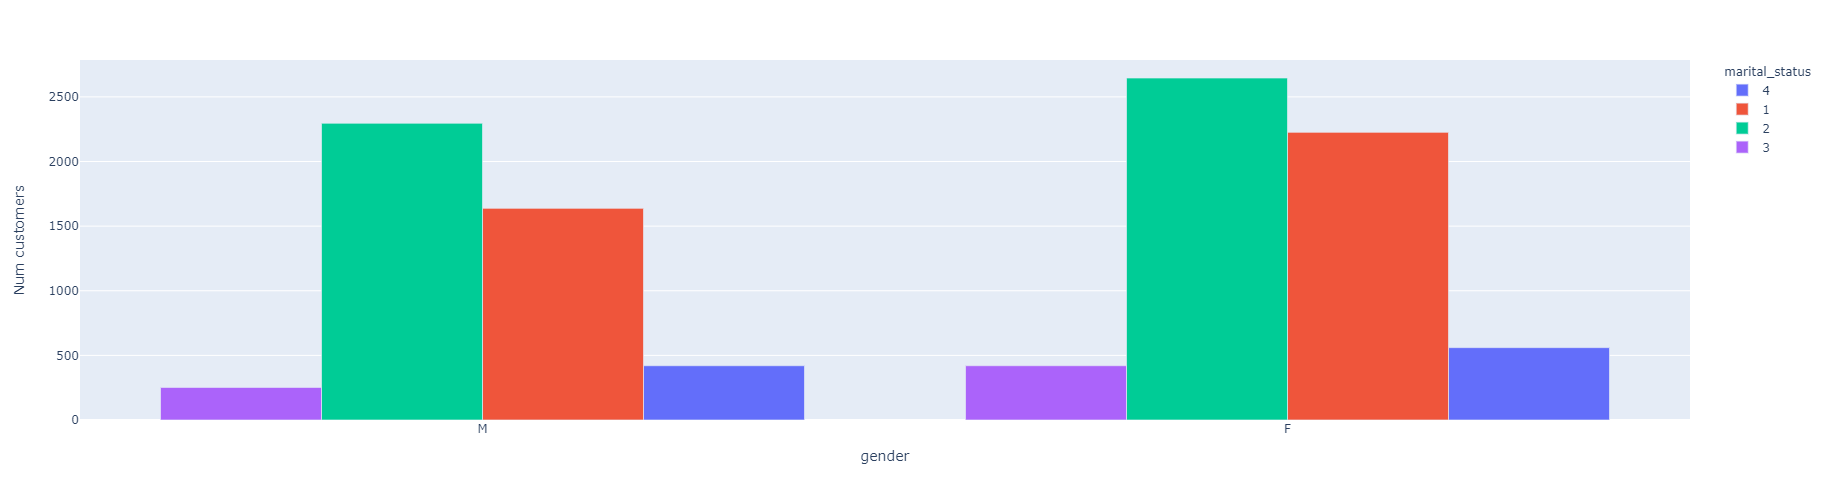

In [25]:
data = tdCustomer_freq2.result.to_pandas().reset_index()
# get center and widht
fig = px.bar(data, x="gender", y="xcnt",
             color='marital_status', barmode='group',
             height=500)

fig.update_yaxes(title="Num customers")

fig['layout']['xaxis']['autorange'] = "reversed"
fig.show()

In [26]:
# Example 3: Next call the Frequency function on the state_code column in the Customer table, taking statistics on income.
tdCustomer_freq3 = valib.Frequency(data=tdCustomer, columns="state_code", stats_columns="income")
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_freq3.result.to_pandas().head(50)

xcnt       xpct  xmin_income  xmax_income  \
xtbl     xcol       xval                                                
Customer state_code DC      84.0   0.803213       1761.5      67155.4   
                    TN     252.0   2.409639       1124.8     205548.2   
                    NB      42.0   0.401606       2624.1      94458.0   
                    NY    1498.0  14.323963          0.0     234644.8   
                    NJ     168.0   1.606426          0.0     129040.6   
                    KS      42.0   0.401606          0.0      51966.2   
                    WI     210.0   2.008032        464.0     241956.0   
                    CA    2478.0  23.694779          0.0     332404.8   
                    AL      56.0   0.535475       1649.4      39361.4   
                    IN     224.0   2.141901          0.0     174018.0   
                    MO     238.0   2.275770          0.0     179225.8   
                    WA     126.0   1.204819       1207.3      80704.0   
                    MD     112.0   1.070950          0.0     143158.6   
                    FL     224.0   2.141901          0.0     288610.4   
                    MN     182.0   1.740295          0.0     151364.2   
                    AZ     336.0   3.212851          0.0     218712.0   
                    TX    1162.0  11.111111          0.0     374808.2   
                    VA      70.0   0.669344          0.0     225534.4   
                    NC     126.0   1.204819        856.5     202090.2   
                    CO     154.0   1.472557        840.6     248521.0   
                    IL     784.0   7.496653          0.0     335909.6   
                    HI     182.0   1.740295          0.0     103849.2   
                    OR     224.0   2.141901          0.0     146291.6   
                    OK     224.0   2.141901          0.0     112860.8   
                    OH     322.0   3.078983          0.0     169062.4   
                    MI     126.0   1.204819          0.0     198577.6   
                    PA     294.0   2.811245          0.0     223743.0   
                    NM      98.0   0.937082          0.0     159380.0   
                    GA      28.0   0.267738       2372.2      77578.8   
                    LA      42.0   0.401606       1673.9      59235.8   
                    NV      56.0   0.535475          0.0      67990.0   
                    MA     112.0   1.070950          0.0     108290.0   
                    KY     182.0   1.740295          0.0     113955.4   

                          xmean_income   xstd_income  
xtbl     xcol       xval                              
Customer state_code DC    22586.242857  16019.276711  
                    TN    28472.663492  32040.450997  
                    NB    31007.771429  23224.028780  
                    NY    31286.770628  36219.221794  
                    NJ    24440.998810  27981.736222  
                    KS    12033.150000  14476.031429  
                    WI    27768.799048  37459.286544  
                    CA    30083.408232  37805.364991  
                    AL    15880.569643  10439.297059  
                    IN    27219.521429  31555.337281  
                    MO    29935.244958  33307.699932  
                    WA    24925.124603  19459.314381  
                    MD    28649.943750  33918.205582  
                    FL    38774.348214  47838.489609  
                    MN    22906.390659  27455.956889  
                    AZ    30712.773810  34379.197988  
                    TX    34697.395267  46655.502401  
                    VA    46076.702857  57621.290044  
                    NC    49419.738889  45999.611855  
                    CO    31333.554545  43146.241835  
                    IL    36907.453954  50081.273551  
                    HI    15677.484615  21641.469467  
                    OR    16353.408036  24154.386166  
                    OK    21036.735268  24375.662008  
                    OH    21638.146584  26

### Box Plot - Membership by State

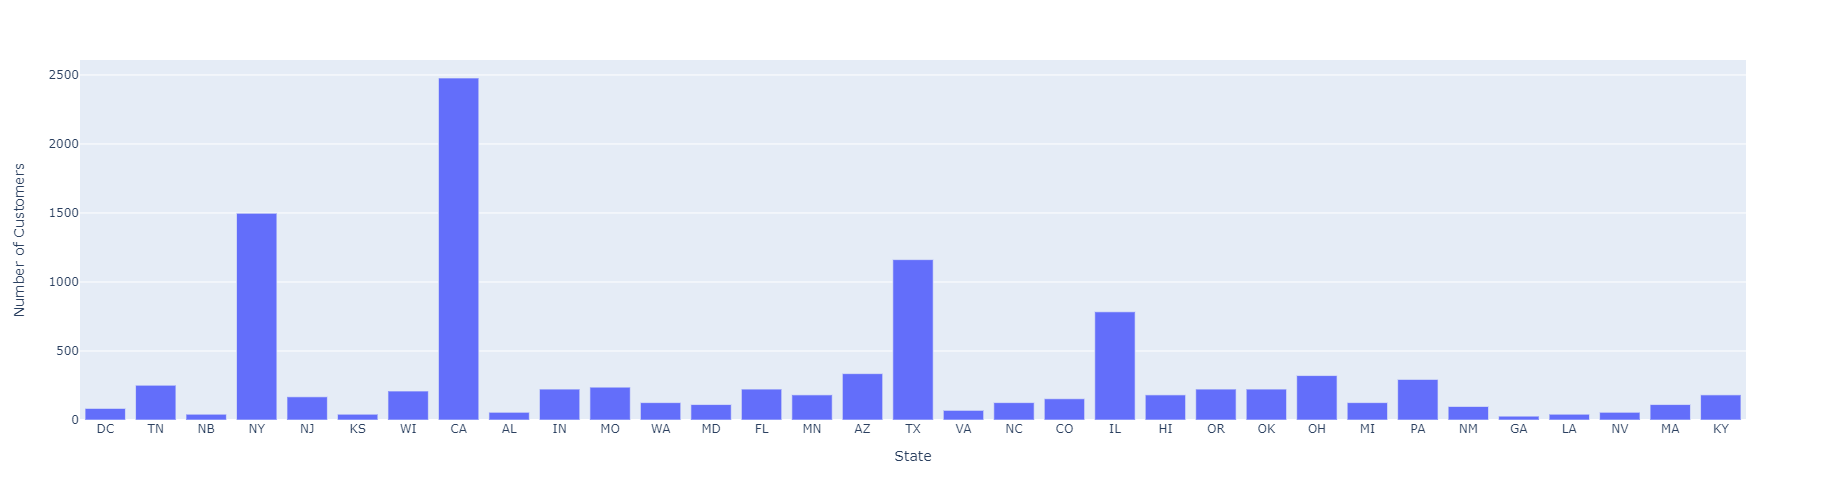

In [27]:
data = tdCustomer_freq3.result.to_pandas().reset_index()
# get center and widht
fig = px.bar(data, x="xval", y="xcnt",height=500)
fig.update_xaxes(title="State")
fig.update_yaxes(title="Number of Customers")
fig.show()

### Box Plot - "Box and Whiskers" Income Levels by State

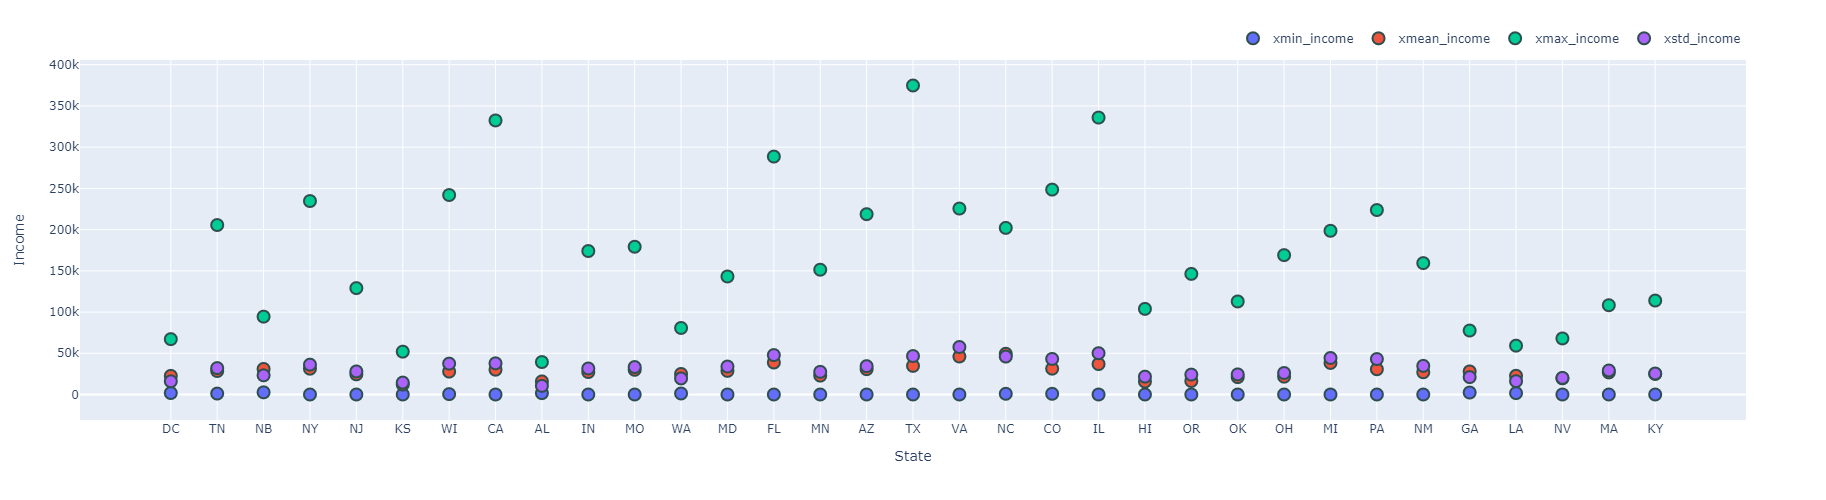

In [28]:
data = tdCustomer_freq3.result.to_pandas().reset_index()
fig = px.scatter(data, x="xval", y=["xmin_income","xmean_income","xmax_income","xstd_income"],height=500,width=1000)
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.update_layout(legend=dict(
    title="",
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.update_yaxes(title="Income")
fig.update_xaxes(title="State")

fig.show()

## Histogram Function

### SIGNATURE:
> valib.Histogram(data, columns=None, bins=10, bins_with_boundaries=None, boundaries=None, quantiles=10, widths=None, exclude_columns=None, overlay_columns=None, stats_columns=None, hist_style="basic", filter=None)

### DESCRIPTION:
Histogram analysis reveals the distribution of continuous numeric or date values in a column. Histogram analysis is also referred to as binning because it counts the occurrence of values in a series of numeric ranges called bins. The histogram analysis provides a number of ways to define bins, allowing multidimensional binning, overlaying of categorical data, and the calculation of numeric statistics within bins. If you set the desired number of equal sized data bins, the desired number of bins with a nearly equal number of values, a desired width, or the specific boundaries, the Histogram analysis separates the data to show its distributional properties. It does this by separating the data by bin number and gives counts and percentages over the requested rows. Percentages always sum to 100%. Separate options are available to specify a number of equal sized data bins in which the analysis determines the minimum and maximum value, as well as a user-specified minimum and maximum value. If the minimum and maximum are specified, all values less than the minimum are put in bin 0, while all values greater than the maximum are put in bin N+1. The same is true when the boundary option is specified. 
The Histogram analysis optionally provides subtotals within each bin of the count, percentage within the bin and percentage overall for each value or combination of values of one or more overlaid columns. Another option is provided to collect simple statistics for a binned column or another column of numeric or date type within the table, providing the minimum, maximum, mean, and standard deviation. When statistics are collected for a date type column, the standard deviation is given in units of days.Histogram analysis can be performed on columns of numeric or date data type.

### PARAMETERS:

#### data:
Required Argument.
Specifies the input data to perform Histogram analysis.
Types: teradataml DataFrame

#### columns:
Required Argument.
Specifies the name(s) of the column(s) to analyze. Occasionally, it can also accept permitted strings to specify all columns, or all numeric columns, or all numeric and date columns.
Permitted Values: 
- Name(s) of the column(s) in "data".
- Pre-defined strings: 
    - 'all' – all columns
    - 'allnumeric' – all numeric columns
    - 'allnumericanddate' - all numeric and date columns

Types: str OR list of Strings (str)

#### bins:
Optional Argument.
Specifies the number of equal width bins to create.
If multiple columns are requested, multiple bin sizes may be specified, such as bins = [5, 10]. If fewer sizes are specified than columns, left-over columns are associated with the default size of 10 bins.
Default Value: 10

Types: int OR list of Integers (int)

#### bins_with_boundaries:
Optional Argument.
Specifies the number of bins spanning a range specified by the minimum and maximum values.
For example, 
    bins_with_boundaries = [5,0,200] 
    creates 5 bins ranging from 0 to 200. 
If multiple columns are requested, multiple sets of parameters must be specified, such as bins_with_boundaries = ["{10, 0, 200000}", "{5, 0, 100}"]. Note that multiple values are provided as string with numbers enclosed in curly braces '{}'. Each such value corresponds to the value in "columns" argument.

Types: int, str OR list of Integers (int) or Strings (str)

#### boundaries:
Optional Argument.
Specifies the boundaries that define the bins.
For example, 
    boundaries = [0,50,100,150]
    provides 3 bins between 0 and 150 (0 to 50, 50 to 100, and 100 to 150). 
If multiple columns are requested, multiple sets of parameters must be specified, such as boundaries = ["{0, 50000, 100000, 150000}", "{0, 50, 100}"]. Note that multiple values are provided as string with numbers enclosed in curly braces '{}'. Each such value corresponds to the value in "columns" argument.

Types: int, str OR list of Integers (int) or Strings (str)

#### quantiles:
Optional Argument.
Specifies the number of approximately equally populated bins to create.
If multiple columns are requested, multiple quantile sizes may be specified, such as quantiles=5, 10. If fewer sizes are specified than columns, left-over columns are associated with the default size of 10 quantiles.
Default Value: 10

Types: int OR list of Integers (int)

#### widths: 
Optional Argument.
Specifies the width of the bins to create.
If multiple columns are requested, multiple widths must be specified, such as widths = [5, 10]. If fewer sizes are specified than columns, an error message displays.

Types: int OR list of Integers (int)

#### exclude_columns:
Optional Argument.
Specifies the name(s) of the column(s) to exclude from the analysis, if a column specifier such as 'all', 'allnumeric', 'allnumericanddate' is used in the "columns" argument.

Types: str OR list of Strings (str)

#### overlay_columns:
Optional Argument.
Specifies a categorical variable with only a few values. If an overlay column is specified, frequencies within each bin are calculated for each value of that overlay column (frequencies for crosstabs of values are given if more than one overlay column is requested). 
Note:
    Use a specific column in either "overlay_columns" or "stats_columns", but not both.

Types: str OR list of Strings (str)

#### stats_columns:
Optional Argument.
Specifies a list of numeric columns/aliases for which simple statistics are calculated (minimum, maximum, mean and standard deviation) in each bin. This argument is not available for DATE columns.
Note:
    Use a specific column in either "overlay_columns" or "stats_columns", but not both.

Types: str OR list of Strings (str)

#### hist_style:
Optional Argument.
Specifies the histogram style to use for analysis.
Permitted Values:
- 'basic' - Creates a histogram for individual columns.
- 'crosstab' - Creates a multidimensional histogram by combining columns.
Default Value: 'basic'

Types: str

#### filter:
Optional Argument.
Specifies the clause to filter rows selected for analysis within Histogram.
For example,
    filter = "cust_id > 0"

Types: str

### RETURNS:
An instance of Histogram.
Output teradataml DataFrames can be accessed using attribute references, such as HistogramObj.<attribute_name>.
Output teradataml DataFrame attribute name is: result.

### RAISES:
TeradataMlException, TypeError, ValueError

In [29]:
# Example 1: Perform Histogram analysis on income by specifying number of "bins" to show skewed distribution
tdCustomer_hist1 = valib.Histogram(data=tdCustomer, columns="income", bins=25)
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_hist1.result.to_pandas().head(25)

Empty DataFrame
Columns: []
Index: [(TRNG_XSP, Customer, income, 15, 209892.592, 224884.92, 17.0, 0.16255498183209027), (TRNG_XSP, Customer, income, 18, 254869.576, 269861.904, 8.0, 0.07649646203863071), (TRNG_XSP, Customer, income, 4, 44976.984, 59969.312, 773.0, 7.391470644482693), (TRNG_XSP, Customer, income, 13, 179907.936, 194900.264, 32.0, 0.30598584815452284), (TRNG_XSP, Customer, income, 14, 194900.264, 209892.592, 23.0, 0.2199273283610633), (TRNG_XSP, Customer, income, 8, 104946.296, 119938.624, 153.0, 1.4629948364888123), (TRNG_XSP, Customer, income, 11, 149923.28, 164915.608, 47.0, 0.4494167144769554), (TRNG_XSP, Customer, income, 19, 269861.904, 284854.232, 3.0, 0.02868617326448652), (TRNG_XSP, Customer, income, 25, 359815.872, 374808.2, 2.0, 0.019124115509657678), (TRNG_XSP, Customer, income, 16, 224884.92, 239877.248, 9.0, 0.08605851979345955), (TRNG_XSP, Customer, income, 7, 89953.968, 104946.296, 232.0, 2.2183973991202905), (TRNG_XSP, Customer, income, 12, 164915.608, 179907.936, 42.0, 0.40160642570281124), (TRNG_XSP, Customer, income, 20, 284854.232, 299846.56, 4.0, 0.038248231019315355), (TRNG_XSP, Customer, income, 22, 314838.888, 329831.216, 2.0, 0.019124115509657678), (TRNG_XSP, Customer, income, 6, 74961.64, 89953.968, 344.0, 3.2893478676611205), (TRNG_XSP, Customer, income, 3, 29984.656, 44976.984, 1206.0, 11.53184165232358), (TRNG_XSP, Customer, income, 17, 239877.248, 254869.576, 4.0, 0.038248231019315355), (TRNG_XSP, Customer, income, 10, 134930.952, 149923.28, 66.0, 0.6310958118187033), (TRNG_XSP, Customer, income, 9, 119938.624, 134930.952, 109.0, 1.0422642952763435), (TRNG_XSP, Customer, income, 23, 329831.216, 344823.544, 3.0, 0.02868617326448652), (TRNG_XSP, Customer, income, 5, 59969.312, 74961.64, 522.0, 4.991394148020654), (TRNG_XSP, Customer, income, 1, 0.0, 14992.328, 4974.0, 47.56167527251865), (TRNG_XSP, Customer, income, 2, 14992.328, 29984.656, 1882.0, 17.995792694587877), (TRNG_XSP, Customer, income, 21, 299846.56, 314838.888, 1.0, 0.009562057754828839)]

### Histogram of Income - 25 even width bins

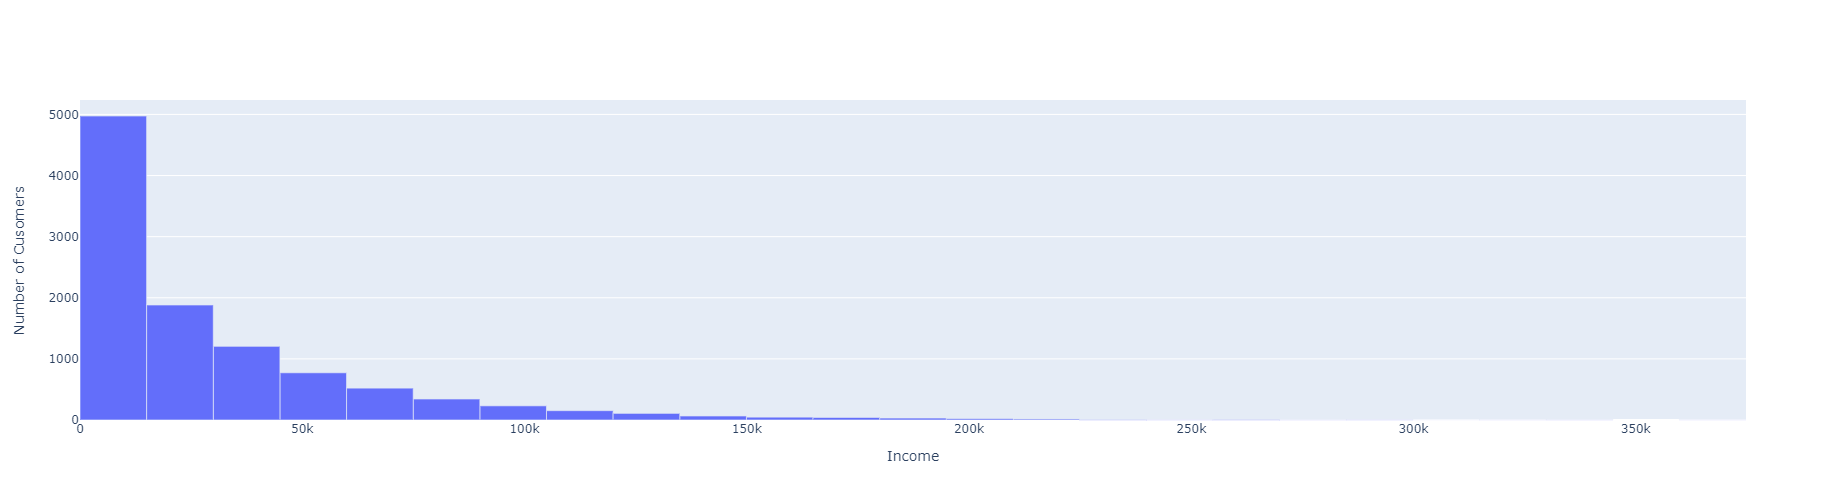

In [30]:
data = tdCustomer_hist1.result.to_pandas().reset_index()
data["xcenter"] =  (data.xend + data.xbeg) / 2
data["xwidth"] =  data.xend - data.xbeg
fig = go.Figure(data=[go.Bar(x=data.xcenter, y=data.xcnt, width=data.xwidth)])

fig.update_layout(height=500)
fig.update_yaxes(title="Number of Cusomers")
fig.update_xaxes(title="Income")
fig.update_layout(showlegend=False)
fig.show() 

In [31]:
# Example 2: Perform Histogram analysis on income using "quantiles" to show skewed distribution
tdCustomer_hist2 = valib.Histogram(data=tdCustomer, columns="income", quantiles=25)
# Print the results.
# Using to_pandas() for a cleaner display format
tdCustomer_hist2.result.to_pandas().head(25)

Empty DataFrame
Columns: []
Index: [(TRNG_XSP, Customer, income, 25, 114448.0, 374808.2, 418.0, 3.9969401415184547), (TRNG_XSP, Customer, income, 4, 197.4, 1363.5, 246.0, 2.3522662076878946), (TRNG_XSP, Customer, income, 7, 3861.3, 5184.4, 419.0, 4.006502199273283), (TRNG_XSP, Customer, income, 8, 5187.6, 6591.3, 418.0, 3.9969401415184547), (TRNG_XSP, Customer, income, 6, 2567.8, 3859.2, 418.0, 3.9969401415184547), (TRNG_XSP, Customer, income, 1, 0.0, 0.0, 1428.0, 13.654618473895582), (TRNG_XSP, Customer, income, 15, 20996.8, 24582.6, 418.0, 3.9969401415184547), (TRNG_XSP, Customer, income, 9, 6605.0, 8423.0, 418.0, 3.9969401415184547), (TRNG_XSP, Customer, income, 17, 28409.7, 32552.0, 418.0, 3.9969401415184547), (TRNG_XSP, Customer, income, 22, 58834.0, 69515.2, 419.0, 4.006502199273283), (TRNG_XSP, Customer, income, 10, 8424.0, 10443.5, 420.0, 4.016064257028113), (TRNG_XSP, Customer, income, 18, 32581.0, 37763.0, 418.0, 3.9969401415184547), (TRNG_XSP, Customer, income, 21, 50191.9, 58806.0, 418.0, 3.9969401415184547), (TRNG_XSP, Customer, income, 11, 10444.5, 12710.0, 417.0, 3.987378083763626), (TRNG_XSP, Customer, income, 5, 1369.6, 2564.4, 418.0, 3.9969401415184547), (TRNG_XSP, Customer, income, 24, 85826.0, 114388.0, 418.0, 3.9969401415184547), (TRNG_XSP, Customer, income, 14, 17954.3, 20996.7, 418.0, 3.9969401415184547), (TRNG_XSP, Customer, income, 13, 15355.6, 17952.2, 419.0, 4.006502199273283), (TRNG_XSP, Customer, income, 23, 69582.0, 85820.0, 418.0, 3.9969401415184547), (TRNG_XSP, Customer, income, 12, 12712.0, 15351.0, 418.0, 3.9969401415184547), (TRNG_XSP, Customer, income, 20, 43456.0, 50180.0, 418.0, 3.9969401415184547), (TRNG_XSP, Customer, income, 16, 24596.0, 28402.0, 419.0, 4.006502199273283), (TRNG_XSP, Customer, income, 19, 37770.0, 43449.3, 419.0, 4.006502199273283)]

### Histogram of Income - 25 Quantile bins

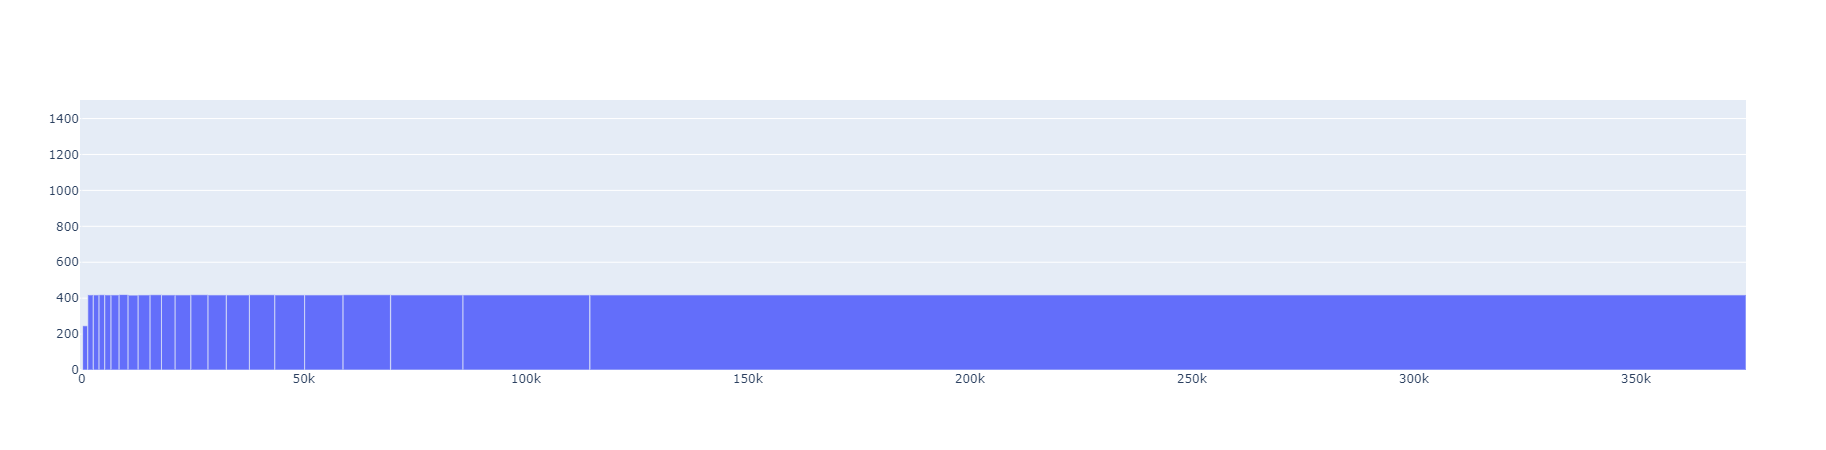

In [32]:
data = tdCustomer_hist2.result.to_pandas().reset_index()
# get center and widht
income_center = (data.xend + data.xbeg) / 2
income_width = data.xend - data.xbeg
count = data.xcnt
fig = go.Figure(data=[go.Bar(x=income_center, y=count, width=income_width)])
fig.show()

In [33]:
# Example 3: Perform Histogram analysis on age, overlayed by state_code
tdCustomer_hist3 = valib.Histogram(data=tdCustomer, columns="income", bins=25, overlay_columns="state_code")
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_hist3.result.to_pandas().head(25)

xocnt  \
xdb      xtbl     xcol   xbin xbeg       xend       xcnt   xpct      ovly_state_code           
TRNG_XSP Customer income 7    89953.968  104946.296 232.0  2.218397  TN                  2.0   
                         3    29984.656  44976.984  1206.0 11.531842 NC                 15.0   
                         4    44976.984  59969.312  773.0  7.391471  IN                 19.0   
                         10   134930.952 149923.280 66.0   0.631096  NC                  3.0   
                         14   194900.264 209892.592 23.0   0.219927  NC                  1.0   
                                                                     WI                  1.0   
                         3    29984.656  44976.984  1206.0 11.531842 NB                  9.0   
                         2    14992.328  29984.656  1882.0 17.995793 IN                 38.0   
                         5    59969.312  74961.640  522.0  4.991394  HI                  3.0   
                         1    0.000      14992.328  4974.0 47.561675 KS                 29.0   
                         7    89953.968  104946.296 232.0  2.218397  HI                  2.0   
                         1    0.000      14992.328  4974.0 47.561675 CA               1188.0   
                         13   179907.936 194900.264 32.0   0.305986  CA                  7.0   
                         5    59969.312  74961.640  522.0  4.991394  NB                  2.0   
                         8    104946.296 119938.624 153.0  1.462995  OR                  1.0   
                         4    44976.984  59969.312  773.0  7.391471  MN                  9.0   
                                                                     NB                  5.0   
                                                                     KY                 14.0   
                                                                     AZ                 30.0   
                         3    29984.656  44976.984  1206.0 11.531842 AZ                 44.0   
                         1    0.000      14992.328  4974.0 47.561675 MN                 96.0   
                                                                     GA                  9.0   
                         11   149923.280 164915.608 47.0   0.449417  TN                  1.0   
                         4    44976.984  59969.312  773.0  7.391471  CO                  9.0   
                         2    14992.328  29984.656  1882.0 17.995793 MO                 48.0   

                                                                                         xobpct  \
xdb      xtbl     xcol   xbin xbeg       xend       xcnt   xpct      ovly_state_code              
TRNG_XSP Customer income 7    89953.968  104946.296 232.0  2.218397  TN                0.862069   
                         3    29984.656  44976.984  1206.0 11.531842 NC                1.243781   
                         4    44976.984  59969.312  773.0  7.391471  IN                2.457956   
                         10   134930.952 149923.280 66.0   0.631096  NC                4.545455   
                         14   194900.264 209892.592 23.0   0.219927  NC                4.347826   
                                                                     WI                4.347826   
                         3    29984.656  44976.984  1206.0 11.531842 NB                0.746269   
                         2    14992.328  29984.656  1882.0 17.995793 IN                2.019129   
                         5    59969.312  74961.640  522.0  4.991394  HI                0.574713   
                         1    0.000      14992.328  4974.0 47.561675 KS                0.583032   
                         7    89953.968  104946.296 232.0  2.218397  HI                0.862069   
                         1    0.000      14992.328  4974.0 47.561675 CA               23.884198   
                         13   179907.936 194900.264 32.0   0.305986  CA               21.875000   
         

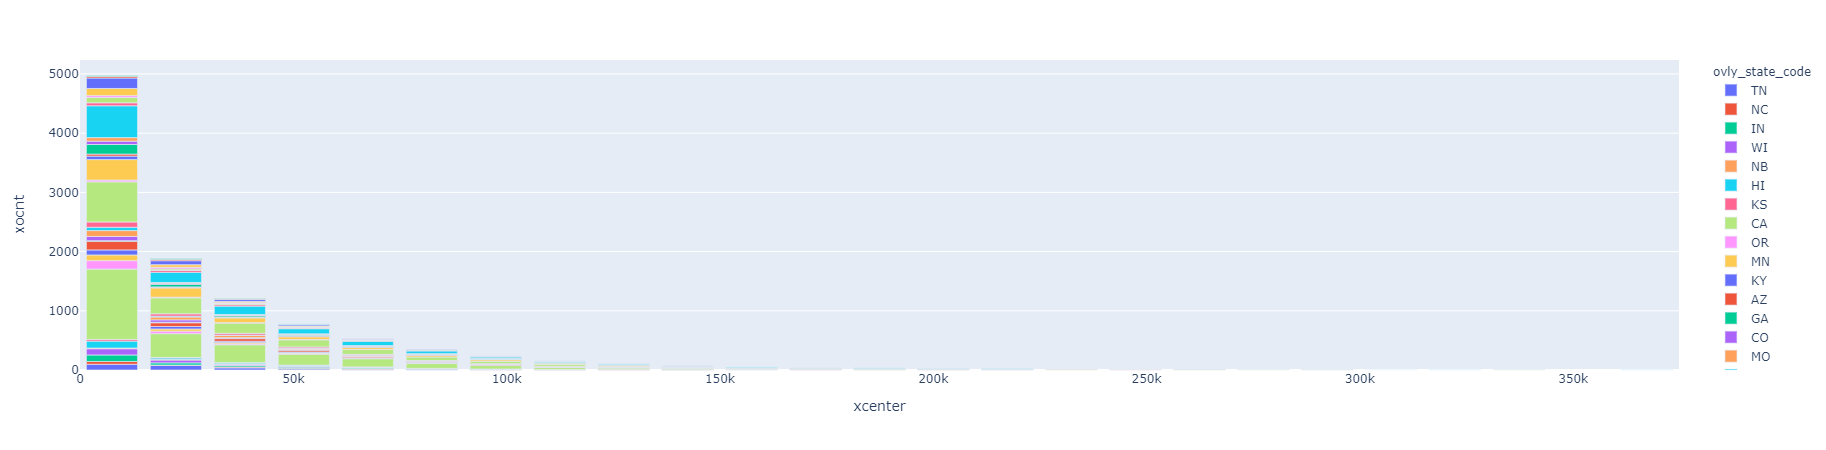

In [34]:
data = tdCustomer_hist3.result.to_pandas().reset_index()
# get center and widht
data["xcenter"] =  (data.xend + data.xbeg) / 2
data["xwidth"] =  data.xend - data.xbeg
fig = px.bar(data, x="xcenter", y="xocnt", color="ovly_state_code")
fig.show()


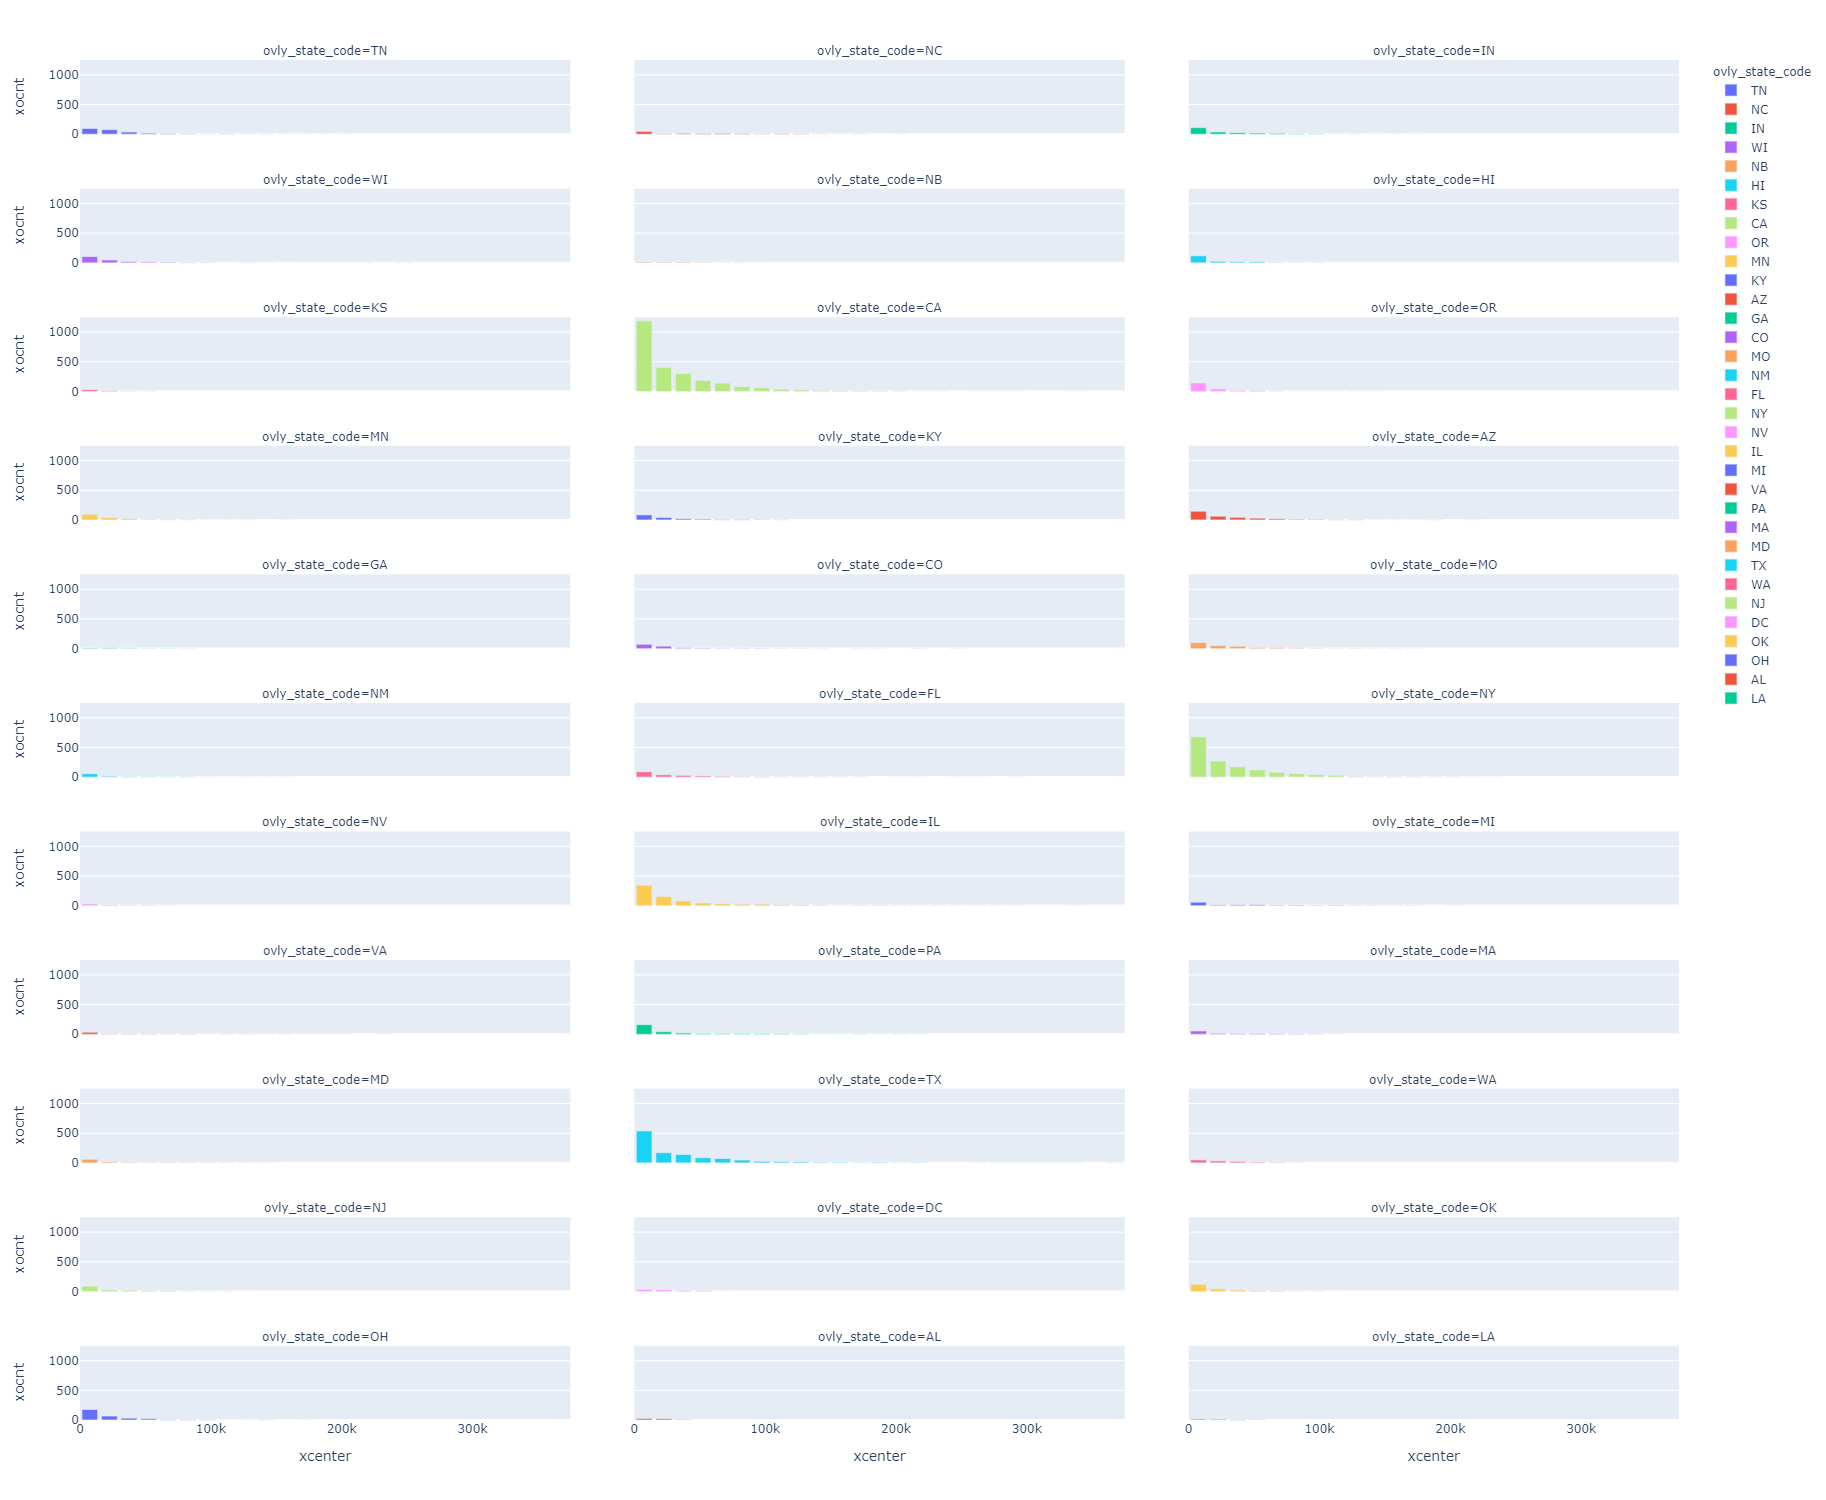

In [35]:
data = tdCustomer_hist3.result.to_pandas().reset_index()
# get center and widht
data["xcenter"] =  (data.xend + data.xbeg) / 2
data["xwidth"] =  data.xend - data.xbeg
fig = px.bar(data, x="xcenter", y="xocnt", facet_col="ovly_state_code", color="ovly_state_code", facet_col_wrap=3,
              facet_row_spacing=0.04, # default is 0.07 when facet_col_wrap is used
              facet_col_spacing=0.04, # default is 0.03
              height=1500, width=1200,)
fig.show()

# Data Preparation

## Transform Function

### SIGNATURE:
>valib.Transform(data, bins=None, derive=None, one_hot_encode=None, fillna=None, label_encode=None, rescale=None, retain=None, sigmoid=None, zscore=None, fallback=False, index_columns=None, unique_index=False, key_columns=None, allow_duplicates=None, nopi=None, filter=None)

### DESCRIPTION:

The Variable Transformation analysis reads a teradataml DataFrame and produces an output containing transformed columns. This is useful when preparing data for input to an analytic algorithm. For example, a K-Means Clustering algorithm typically produces better results when the input columns are first converted to their Z-Score values to put all input variables on an equal footing, regardless of their magnitude. 
Function supports following transformations:

- Binning – Binning replaces a continuous numeric column with a categorical one to produce ordinal values (for example, numeric categorical values where order is meaningful).
- Derive – The Derive transformation requires the free-form transformation be specified as a formula.
- One Hot Encoding – One Hot Encoding is useful when a categorical data element must be re-expressed as one or more numeric data elements, creating a binary numeric field for each categorical data value.
- Missing Value Treatment or Null Replacement.
- Label Encoding – Allows to re-express existing values of a categorical data column (variable) into a new coding scheme or to correct data quality problems and focus an analysis on a value.
- Min-Max Scaling – Limits the upper and lower boundaries of the data in a continuous numeric column using a linear rescaling function based on maximum and minimum data values.
- Retain - Allows copying of one or more columns into the final analytic data set.
- Sigmoid – Provides rescaling of continuous numeric data using a type of sigmoid or s-shaped function.
- ZScore – Provides rescaling of continuous numeric data using Z-Scores.

### PARAMETERS:

#### data:
Required Argument.
Specifies the input data to perform variable transformations.

Types: teradataml DataFrame

#### bins:
Optional Argument.
Specifies one or more instances of Binning Transformation. Binning replaces a continuous numeric column with a categorical one to produce ordinal values (for example, numeric categorical values where order is meaningful). Check the documentation of 'teradataml.analytics.Transformation.Binning' to know more about Binning.

Types: Binning OR List of Binning

#### derive:
Optional Argument.
Specifies one or more instances of Derive Transformation. This argument allows user to perform a free form transformation using arithmetic formula. Check the documentation of 'teradataml.analytics.Transformation.Derive' to know more about Derive.

Types: Derive OR List of Derive

#### one_hot_encode:
Optional Argument.
Specifies one or more instances of OneHotEncoder Transformation. One hot encoding allows user to re-express categorical data as one or more numeric data elements, creating a binary numeric field for each categorical data value. Check the documentation of 'teradataml.analytics.Transformation.OneHotEncoder' to know more about OneHotEncoder.

Types: OneHotEncoder OR List of OneHotEncoder

#### fillna:
Optional Argument.
Specifies one or more instances of FillNa Transformation. This argument allows user to perform a missing value/null replacement transformation. Check the documentation of 'teradataml.analytics.Transformation.FillNa' to know more about FillNa.

Types: FillNa OR List of FillNa

#### label_encode:
Optional Argument.
Specifies one or more instances of LabelEncoder Transformation. This allows to re-express existing values of a categorical data column (variable) into a new coding scheme. Check the documentation of 'teradataml.analytics.Transformation.LabelEncoder' to know more about LabelEncoder.

Types: LabelEncoder OR List of LabelEncoder

#### rescale:
Optional Argument.
Specifies one or more instances of MinMaxScalar Transformation. This limits the upper and lower boundaries of the data in a continuous numeric column using a linear rescaling function based on maximum and minimum data values. Check the documentation of 'teradataml.analytics.Transformation.MinMaxScalar' to know more about MinMaxScalar.

Types: MinMaxScalar OR List of MinMaxScalar

#### retain:
Optional Argument.
Specifies one or more instances of Retain Transformation. This argument allows user to retain columns from input to output. Check the documentation of 'teradataml.analytics.Transformation.Retain' to know more about Retain.

Types: Retain OR List of Retain

#### sigmoid:
Optional Argument.
Specifies one or more instances of Sigmoid Transformation. This argument allows user to perform a rescaling using sigmoid transformation. Check the documentation of 'teradataml.analytics.Transformation.Sigmoid' to know more about Sigmoid.

Types: Sigmoid OR List of Sigmoid

#### zscore:
Optional Argument.
Specifies one or more instances of ZScore Transformation. This argument allows user to perform a rescaling using Z-Score transformation. Check the documentation of 'teradataml.analytics.Transformation.ZScore' to know more about ZScore.

Types: ZScore OR List of ZScore

#### fallback:
Optional Argument.
Specifies whether a mirrored copy of underlying table of output DataFrame is required or not.
Default Value: False

Types: bool

#### index_columns:
Optional Argument.
Specifies the name(s) of the output column(s) to be used as index in output DataFrame.

Types: str OR List of Strings (str)

#### unique_index:
Optional Argument.
Specifies whether the underlying output table should contain a unique primary index or not.
Default Value: False

Types: bool

#### key_columns:
Optional Argument.
Specifies the name(s) of the column(s) that can be unique key in input and output teradataml DataFrame. When null replacement is requested, i.e., "fillna" argument is used either in FillNa transformation or in combination with a Binning, Derive, OneHotEncoder, LabelEncoder, MinMaxScalar, Sigmoid, or ZScore transformation, the "key_columns" argument must be specified.

Types: str OR List of Strings (str)

#### allow_duplicates:
Optional Argument.
Specifies whether output should contain duplicate rows or not.

Types: bool

#### nopi:
Optional Argument.
Specifies whether the underlying output table should contain no index columns. When True, output table does not contain index columns.
Note:
    When this argument is set to True, "allow_duplicates" must also be set to True.

Types: bool

#### filter:
Optional Argument.
Specifies the clause to filter rows selected for transformation.
For example,
    filter = "cust_id > 0"

Types: str

### RETURNS:
An instance of Transform.
Output teradataml DataFrames can be accessed using attribute references, such as TransformObj.<attribute_name>.
Output teradataml DataFrame attribute name is: result.

### RAISES:
TeradataMlException, TypeError, ValueError


In [13]:
# First, grab customer demographic variables and create binned variables and one-hot encoded variables from the customer table.

fn = FillNa(style = "median")

income_t = Binning(style = "bins", value = 100, columns = "income", out_columns = "income_bins", fillna = fn)
age_t = Binning(style = "bins", value = 10, columns = "age", out_columns = "age_bins", fillna = fn)
gender_t = OneHotEncoder(values = {"M":"male_ind", "F":"female_ind"}, columns = "gender", fillna = fn)
marital_status_t = OneHotEncoder(values = {1:"single_ind", 2:"married_ind", 3:"separated_ind", 4:"widower_ind"}, 
                                 columns = "marital_status", fillna = fn)
state_code_t = OneHotEncoder(values = {"CA":"ca_resident_ind", "NY":"ny_resident_ind", 
                                       "TX":"tx_resident_ind", "IL":"il_resident_ind",
                                       "AZ":"az_resident_ind", "OH":"oh_resident_ind"}, 
                             columns = "state_code", fillna = fn)
fillna_t1 = FillNa(style = "median", columns = "years_with_bank", out_columns = "tot_cust_years", datatype = 'integer')
fillna_t2 = FillNa(style = "median", columns = "nbr_children", out_columns = "tot_children", datatype = 'integer')
labelencoder_t = LabelEncoder(values={"CA": "CA", "NY": "NY", "TX": "TX", "OH": "OH", "AZ": "AZ", "IL": "IL"}, 
                              columns="state_code", default="OTHER", datatype = 'char,6')

cust = valib.Transform(data = tdCustomer,
                       bins = [income_t, age_t],
                       one_hot_encode = [gender_t, marital_status_t, state_code_t],
                       fillna = [fillna_t1, fillna_t2],
                       label_encode = labelencoder_t,
                       key_columns = "cust_id")

cust.result.to_pandas().head(5)

income_bins  age_bins  male_ind  female_ind  single_ind  \
cust_id                                                             
25902814            1         5         0           1           1   
23175148            4         4         0           1           0   
28620753            1         1         1           0           1   
24526440           15         4         0           1           0   
27259000            7         7         0           1           0   

          married_ind  separated_ind  widower_ind  ca_resident_ind  \
cust_id                                                              
25902814            0              0            0                1   
23175148            1              0            0                0   
28620753            0              0            0                0   
24526440            0              0            1                1   
27259000            1              0            0                0   

          ny_resident_ind  tx_resident_ind  il_resident_ind  az_resident_ind  \
cust_id                                                                        
25902814                0                0                0                0   
23175148                0                0                0                0   
28620753                0                0                0                0   
24526440                0                0                0                0   
27259000                0                0                0                0   

          oh_resident_ind  tot_cust_years  tot_children          state_code  
cust_id                                                                      
25902814                0               8             0  CA                  
23175148                0               5             2  OTHER               
28620753                0               8             1  OTHER               
24526440                0               6             5  CA                  
27259000                0               2             0  OTHER

In [14]:
# Next, create account indicators and then calculate account balances

fn = FillNa(style = "literal", value=0)

account_type_t = OneHotEncoder(values = {"CC":"cc_acct_ind", "CK":"ck_acct_ind", 
                                         "SV":"sv_acct_ind"}, 
                               columns = "acct_type", fillna = fn)
fillna_t = FillNa(style = "median", columns = ["cust_id", "starting_balance", "ending_balance"])

acct = valib.Transform(data = tdAccounts,
                       one_hot_encode = [account_type_t],
                       fillna = fillna_t,
                       key_columns = "cust_id")

acct_bal = acct.result.starting_balance + acct.result.ending_balance

acct.result = acct.result.assign(cc_bal = case_when( [(acct.result.cc_acct_ind.expression == 1, acct_bal.expression)
                                                     ], else_=0 )
                        ).assign(ck_bal = case_when( [(acct.result.ck_acct_ind.expression == 1, acct_bal.expression)
                                                     ], else_=0 )
                        ).assign(sv_bal = case_when( [(acct.result.sv_acct_ind.expression == 1, acct_bal.expression)
                                                     ], else_=0 )
                        )

acct.result.to_pandas().head(5)

acct_nbr  cc_acct_ind  ck_acct_ind  sv_acct_ind     cust_id  \
0  456114321362917423            0            1            0  31347091.0   
1  000000001363158310            1            0            0  13631580.0   
2  000000001362897221            0            1            0  28620837.0   
3  456114321362580422            1            0            0  29976760.0   
4  456114321363364415            0            1            0  20450460.0   

   starting_balance  ending_balance     cc_bal     ck_bal  sv_bal  
0            11.000        6890.000      0.000   6901.000     0.0  
1          1470.562        8629.740  10100.302      0.000     0.0  
2           173.120          11.330      0.000    184.450     0.0  
3           493.856       13650.000  14143.856      0.000     0.0  
4          4816.422        9108.447      0.000  13924.869     0.0

In [15]:
# Next get the transaction information required for the Quarterly aggregation by pulling out the quarter the transaction was made.

acct_mon = extract('month', tdTransactions.tran_date.expression).expression

trans = tdTransactions.assign(q1_trans = case( [(acct_mon ==  "1", 1), (acct_mon ==  "2", 1), (acct_mon ==  "3", 1)], else_ = 0 ),
                              q2_trans = case( [(acct_mon ==  "4", 1), (acct_mon ==  "5", 1), (acct_mon ==  "6", 1)], else_ = 0 ),
                              q3_trans = case( [(acct_mon ==  "7", 1), (acct_mon ==  "8", 1), (acct_mon ==  "9", 1)], else_ = 0 ),
                              q4_trans = case( [(acct_mon == "10", 1), (acct_mon == "11", 1), (acct_mon == "12", 1)], else_ = 0 ),
                             )
trans.to_pandas().head(5)

tran_amt principal_amt interest_amt new_balance  \
tran_id acct_nbr                                                             
34      456114321362721417     0.00         76.00        0.000        0.00   
180     000000001362761218     1.95          0.00        4.388     1562.88   
1365    000000001363298215     0.00          0.00        5.000       10.93   
322     000000001362715223   -36.31        -36.31        0.000     2661.23   
1995    000000001362529221    -8.81          0.19        0.000     1008.07   

                             tran_date  tran_time channel tran_code  q1_trans  \
tran_id acct_nbr                                                                
34      456114321362721417  1995-10-20     115004       V        IQ         0   
180     000000001362761218  1995-02-28     235959    None        IN         1   
1365    000000001363298215  1995-01-30     121731       V        IQ         1   
322     000000001362715223  1995-01-12          0       P        WD         1   
1995    000000001362529221  1995-02-03          0       P        WD         1   

                            q2_trans  q3_trans  q4_trans  
tran_id acct_nbr                                          
34      456114321362721417         0         0         1  
180     000000001362761218         0         0         0  
1365    000000001363298215         0         0         0  
322     000000001362715223         0         0         0  
1995    000000001362529221         0         0         0

In [16]:
# Join the transformed Customer table to the transformed Account table

cust_acct = cust.result.join(other = acct.result, how = "left", on = ["cust_id"],
                             lsuffix = "cust", rsuffix = "acct")


cust_acct.to_pandas().head(5)

cust_cust_id  acct_cust_id  income_bins  age_bins  male_ind  female_ind  \
0      20450460    20450460.0            7         4         0           1   
1      25897418    25897418.0            2         5         1           0   
2      24533100    24533100.0            6         7         0           1   
3      19085192    19085192.0           14         4         1           0   
4      31344239    31344239.0           18         4         1           0   

   single_ind  married_ind  separated_ind  widower_ind  ...  \
0           0            1              0            0  ...   
1           0            1              0            0  ...   
2           0            1              0            0  ...   
3           1            0              0            0  ...   
4           0            0              1            0  ...   

           state_code            acct_nbr  cc_acct_ind  ck_acct_ind  \
0  OTHER               456114321363364415          0.0          1.0   
1  OTHER               000000001363022319          0.0          0.0   
2  OTHER               456114321362950418          0.0          1.0   
3  OTHER               000000001363228314          0.0          0.0   
4  CA                  456114321362793423          0.0          1.0   

   sv_acct_ind  starting_balance  ending_balance  cc_bal     ck_bal    sv_bal  
0          0.0          4816.422        9108.447     0.0  13924.869     0.000  
1          1.0           620.820         434.000     0.0      0.000  1054.820  
2          0.0            29.000         249.950     0.0    278.950     0.000  
3          1.0           434.616        6307.686     0.0      0.000  6742.302  
4          0.0           725.430         497.080     0.0   1222.510     0.000  

[5 rows x 28 columns]

In [18]:
# Next Join the transformed Transaction table to the transformed Account table

acct_tran_amt = trans.principal_amt + trans.interest_amt

cust_acct_tran = cust_acct.join(other = trans, how = "left", on = ["acct_nbr"], 
                                lsuffix = "cu_ac", rsuffix = "trans"
                       ).assign(cc_tran_amt = 
                                case_when( [(cust_acct.cc_acct_ind.expression == 1, acct_tran_amt.expression)
                                           ], else_=0 )
                       ).assign(ck_tran_amt = 
                                case_when( [(cust_acct.ck_acct_ind.expression == 1, acct_tran_amt.expression)
                                           ], else_=0 )
                       ).assign(sv_tran_amt = 
                                case_when( [(cust_acct.sv_acct_ind.expression == 1, acct_tran_amt.expression)
                                           ], else_=0 )
                       )

cust_acct_tran.to_pandas().head(10)

cust_cust_id  acct_cust_id  income_bins  age_bins  male_ind  female_ind  \
0      24530904    24530904.0            2        10         1           0   
1      27257620    27257620.0            7         6         1           0   
2      28632807    28632807.0            2         5         0           1   
3      25899337    25899337.0            3         4         1           0   
4      17720027           NaN            9         4         0           1   
5      25905702    25905702.0            2         5         0           1   
6      27263300    27263300.0            9         8         1           0   
7      20449590    20449590.0            7         5         0           1   
8      25891034    25891034.0            1         8         0           1   
9      27250860           NaN           42         4         1           0   

   single_ind  married_ind  separated_ind  widower_ind  ...  tran_time  \
0           0            1              0            0  ...        0.0   
1           0            1              0            0  ...        0.0   
2           1            0              0            0  ...   154056.0   
3           0            0              0            1  ...    92033.0   
4           0            1              0            0  ...        NaN   
5           0            1              0            0  ...   191041.0   
6           0            1              0            0  ...        0.0   
7           1            0              0            0  ...   183147.0   
8           0            0              0            1  ...   235959.0   
9           0            1              0            0  ...        NaN   

   channel  tran_code  q1_trans  q2_trans  q3_trans  q4_trans  cc_tran_amt  \
0        M         PM       1.0       0.0       0.0       0.0      305.662   
1     None         FK       1.0       0.0       0.0       0.0        0.000   
2        C         IQ       1.0       0.0       0.0       0.0        0.000   
3        E         DP       1.0       0.0       0.0       0.0      518.190   
4     None       None       NaN       NaN       NaN       NaN        0.000   
5        A         IQ       1.0       0.0       0.0       0.0        0.000   
6     None         FK       1.0       0.0       0.0       0.0        0.000   
7        B         DP       1.0       0.0       0.0       0.0      437.100   
8     None         IN       0.0       1.0       0.0       0.0        0.000   
9     None       None       NaN       NaN       NaN       NaN        0.000   

  ck_tran_amt sv_tran_amt  
0       0.000       0.000  
1       3.370       0.000  
2       9.000       0.000  
3       0.000       0.000  
4       0.000       0.000  
5      78.000       0.000  
6       3.370       0.000  
7       0.000       0.000  
8      79.302       0.000  
9       0.000       0.000  

[10 rows x 45 columns]

In [20]:
# Finally, aggregate and roll up by 'cust_id' all variables in the above join operation.  This pulls everything together into the 
# analytic data set.

ADS_Py = cust_acct_tran.groupby("cust_cust_id").agg(
                       {
                        "income_bins"     : "max",
                        "age_bins"        : "max",
                        "tot_cust_years"  : "max",
                        "tot_children"    : "max",
                        "female_ind"      : "max",
                        "single_ind"      : "max",
                        "married_ind"     : "max",
                        "separated_ind"   : "max",
                        "ca_resident_ind" : "max",
                        "ny_resident_ind" : "max",
                        "tx_resident_ind" : "max",
                        "il_resident_ind" : "max",
                        "az_resident_ind" : "max",
                        "oh_resident_ind" : "max",
                        "state_code"      : "max",
                        "ck_acct_ind"     : "max",
                        "sv_acct_ind"     : "max",
                        "cc_acct_ind"     : "max",
                        "ck_bal"          : "mean",
                        "sv_bal"          : "mean",
                        "cc_bal"          : "mean",
                        "ck_tran_amt"     : "mean",
                        "sv_tran_amt"     : "mean",
                        "cc_tran_amt"     : "mean",
                        "q1_trans"        : "sum",
                        "q2_trans"        : "sum",
                        "q3_trans"        : "sum",
                        "q4_trans"        : "sum"
                       }
             )

# Rename Columns because of VAL bug with MEAN parsing

columns = ['cust_id','income_bins','age_bins','tot_cust_years','tot_children','female_ind',
           'single_ind', 'married_ind', 'separated_ind', 'state_code', 'ca_resident_ind', 'ny_resident_ind',
           'tx_resident_ind','il_resident_ind','az_resident_ind', 'oh_resident_ind',
           'ck_acct_ind','sv_acct_ind','cc_acct_ind', 'ck_avg_bal','sv_avg_bal','cc_avg_bal',
           'ck_avg_tran_amt','sv_avg_tran_amt','cc_avg_tran_amt','q1_trans_cnt',
           'q2_trans_cnt','q3_trans_cnt','q4_trans_cnt']

ADS_Py = ADS_Py.assign(drop_columns = True,
                       cust_id         = ADS_Py.cust_cust_id,
                       income_bins     = ADS_Py.max_income_bins,
                       age_bins        = ADS_Py.max_age_bins,
                       tot_cust_years  = ADS_Py.max_tot_cust_years,
                       tot_children    = ADS_Py.max_tot_children,
                       female_ind      = ADS_Py.max_female_ind,
                       single_ind      = ADS_Py.max_single_ind,
                       married_ind     = ADS_Py.max_married_ind,
                       separated_ind   = ADS_Py.max_separated_ind,
                       state_code      = ADS_Py.max_state_code,
                       ca_resident_ind = ADS_Py.max_ca_resident_ind,
                       ny_resident_ind = ADS_Py.max_ny_resident_ind,
                       tx_resident_ind = ADS_Py.max_tx_resident_ind,
                       il_resident_ind = ADS_Py.max_il_resident_ind,
                       az_resident_ind = ADS_Py.max_az_resident_ind,
                       oh_resident_ind = ADS_Py.max_oh_resident_ind,
                       ck_acct_ind     = ADS_Py.max_ck_acct_ind,
                       sv_acct_ind     = ADS_Py.max_sv_acct_ind,
                       cc_acct_ind     = ADS_Py.max_cc_acct_ind,
                       ck_avg_bal      = ADS_Py.mean_ck_bal,
                       sv_avg_bal      = ADS_Py.mean_sv_bal,
                       cc_avg_bal      = ADS_Py.mean_cc_bal,
                       ck_avg_tran_amt = ADS_Py.mean_ck_tran_amt,
                       sv_avg_tran_amt = ADS_Py.mean_sv_tran_amt,
                       cc_avg_tran_amt = ADS_Py.mean_cc_tran_amt,
                       q1_trans_cnt    = ADS_Py.sum_q1_trans,
                       q2_trans_cnt    = ADS_Py.sum_q2_trans,
                       q3_trans_cnt    = ADS_Py.sum_q3_trans,
                       q4_trans_cnt    = ADS_Py.sum_q4_trans).select(columns)

copy_to_sql(ADS_Py, table_name="bank_features", if_exists="replace")
ADS_Py = DataFrame("ADS_Py")
ADS_Py.to_pandas().head(5)

cust_id  income_bins  age_bins  tot_cust_years  tot_children  female_ind  \
0  1362850            7        10               6             0           0   
1  1362917           32         6               7             0           1   
2  1363465            8         4               1             1           0   
3  1362893            1         1               7             0           0   
4  1362965           20         9               4             0           0   

   single_ind  married_ind  separated_ind          state_code  ...  \
0           0            0              0  OTHER               ...   
1           0            1              0  OTHER               ...   
2           0            0              0  CA                  ...   
3           1            0              0  OTHER               ...   
4           0            1              0  OTHER               ...   

    ck_avg_bal   sv_avg_bal  cc_avg_bal  ck_avg_tran_amt  sv_avg_tran_amt  \
0   822.126314   822.126314  822.126314        -4.989137        -4.989137   
1   902.479480     0.000000  902.479480       -28.808920         0.000000   
2  1872.965000  1872.965000    0.000000        -6.370067        -6.370067   
3     0.000000  1267.000000    0.000000         0.000000        31.175455   
4          NaN          NaN         NaN         0.000000         0.000000   

   cc_avg_tran_amt  q1_trans_cnt  q2_trans_cnt  q3_trans_cnt  q4_trans_cnt  
0        -4.989137          39.0          45.0          45.0         126.0  
1       -28.808920         150.0          48.0           0.0          52.0  
2         0.000000          18.0          18.0          18.0          96.0  
3         0.000000           3.0           3.0           6.0          10.0  
4         0.000000           NaN           NaN           NaN           NaN  

[5 rows x 29 columns]

# Matrix Function

## Correlation, Covariance (E)SSCP

### SIGNATURE:
>valib.Matrix(data, columns=None, exclude_columns=None, group_columns=None, matrix_output="columns", type="ESSCCP", handle_nulls="IGNORE", filter=None)

### DESCRIPTION:
Matrix builds an extended sum-of-squares-and-cross-products (ESSCP) matrix or other derived matrix type from a teradataml DataFrame. Matrix does this with the help of Teradata CALCMATRIX table operator provided in Teradata Vantage. The purpose in building a matrix depends on the type of matrix built. For example, when a correlation matrix is built, view it to determine the correlations or relationships between the various columns in the matrix.

### PARAMETERS:

#### data:
Required Argument.
Specifies the input data to build matrix from.
Types: teradataml DataFrame

#### columns:
Required Argument.
Specifies the name(s) of the column(s) used in building one or more matrices. Occasionally, it can also accept permitted strings to specify all columns, or all numeric columns.
Note:
    Do not use the following column names, as these are reserved for use by the CALCMATRIX table operator: 
        'rownum', 'rowname', 'c', or 's'.
Permitted Values: 
- Name(s) of the columns in "data".
- Pre-defined strings: 
    - 'all' – all columns
    - 'allnumeric' – all numeric columns

Types: str OR list of Strings (str)

#### exclude_columns:
Optional Argument.
Specifies the name(s) of the column(s) to exclude from the analysis, if a column specifier such as 'all', 'allnumeric' is used in the "columns" argument.
For convenience, when the "exclude_columns" argument is used, dependent variable and group by columns, if any, are automatically excluded as input columns and do not need to be included in this argument.

Types: str OR list of Strings (str)

#### group_columns:
Optional Argument.
Specifies the name(s) of the column(s) in input teradataml DataFrame to perform build a separate matrix for each combination. If specified, group by columns divide the input into parts, one for each combination of values in the group by columns. For each combination of values, a separate matrix is built, though they are all stored in the same output.
Note:
    Do not use the following column names, as these are reserved for use by the CALCMATRIX table operator: 
        'rownum', 'rowname', 'c', or 's'.

Types: str OR list of Strings (str)

#### matrix_output:
Optional Argument.
Specifies the type of matrix output. Matrix output can either be returned as COLUMNS in a output teradataml DataFrame or as VARBYTE values, one per column, in a reduced output teradataml DataFrame. 
Permitted Values: 'columns', 'varbyte'
Default Value: 'columns'

Types: str

#### type:
Optional Argument.
Specifies the type of matrix to build.
Permitted Values: 
- 'SSCP' - sum-of-squares-and-cross-products matrix
- 'ESSCP' - Extended-sum-of-squares-and-cross-products matrix 
- 'CSSCP' - Corrected-sum-of-squares-and-cross-products matrix
- 'COV' - Covariance matrix
- 'COR' - Correlation matrix
Default Value: 'ESSCCP'

Types: str 

#### handle_nulls:
Optional Argument.
Specifies a way to treat null values in selected columns. When set to IGNORE, the row that contains the NULL value in a selected column is omitted from processing. When set to ZERO, the NULL value is replaced with zero (0) in calculations.
Permitted Values: 'IGNORE', 'ZERO'
Default Value: 'IGNORE'

Types: str

#### filter:
Optional Argument.
Specifies the clause to filter rows selected for building the matrix.
For example,
        filter = "cust_id > 0"

Types: str

### RETURNS:
An instance of Matrix.
Output teradataml DataFrames can be accessed using attribute references, such as MatrixObj.<attribute_name>.
Output teradataml DataFrame attribute name is: result.

### RAISES:
TeradataMlException, TypeError, ValueError


In [43]:
Cor_Mat = valib.Matrix(data=ADS_Py, columns='all', exclude_columns="state_code", type="COR")
# Print the results.
Cor_Mat.result.to_pandas().head(30)

cust_id  income_bins  age_bins  tot_cust_years  \
rownum rowname                                                            
14     az_resident_ind  0.000049     0.002082  0.048788       -0.037738   
13     il_resident_ind -0.000049     0.051462 -0.036377       -0.033894   
23     sv_avg_tran_amt  0.008710    -0.043733 -0.073232        0.040902   
15     oh_resident_ind  0.000089    -0.039792  0.008293       -0.017917   
7      single_ind      -0.000011    -0.218484 -0.496272       -0.024721   
26     q2_trans_cnt     0.000018     0.032881  0.102189       -0.007001   
18     cc_acct_ind     -0.000020     0.104825  0.135543        0.007658   
24     cc_avg_tran_amt -0.003741    -0.018184  0.005783        0.012657   
11     ny_resident_ind -0.000044     0.012313  0.041632       -0.004005   
4      tot_cust_years  -0.023837     0.053569  0.167734        1.000000   
21     cc_avg_bal      -0.001088     0.309852  0.086946        0.087288   
2      income_bins      0.142175     1.000000  0.161152        0.053569   
27     q3_trans_cnt    -0.000024     0.075227  0.089794       -0.067956   
22     ck_avg_tran_amt  0.142311    -0.096675 -0.028110        0.048048   
1      cust_id          1.000000     0.142175  0.021212       -0.023837   
28     q4_trans_cnt    -0.000001    -0.010441  0.035041       -0.171774   
6      female_ind      -0.000012    -0.113023 -0.007638       -0.003980   
3      age_bins         0.021212     0.161152  1.000000        0.167734   
25     q1_trans_cnt     0.000005     0.036023  0.113745        0.125356   
19     ck_avg_bal      -0.004077     0.283033  0.062212        0.064198   
20     sv_avg_bal       0.000073     0.120490 -0.034703        0.093063   
5      tot_children    -0.442183     0.085500 -0.055468       -0.004831   
8      married_ind      0.000014     0.120152  0.406851        0.050140   
17     sv_acct_ind     -0.000012    -0.065634 -0.030388       -0.021887   
9      separated_ind   -0.000030     0.132450  0.054650       -0.023070   
12     tx_resident_ind -0.000022     0.043063  0.013176       -0.031991   
10     ca_resident_ind -0.000015     0.001377 -0.102111        0.032131   
16     ck_acct_ind      0.000007     0.077085  0.124022       -0.069461   

                        tot_children  female_ind  single_ind  married_ind  \
rownum rowname                                                              
14     az_resident_ind     -0.037144    0.039304   -0.029372     0.010015   
13     il_resident_ind      0.034644   -0.023921   -0.007275    -0.014899   
23     sv_avg_tran_amt     -0.024451    0.044705    0.046324    -0.038884   
15     oh_resident_ind     -0.044726    0.002027    0.008060     0.002036   
7      single_ind          -0.374131    0.025466    1.000000    -0.724575   
26     q2_trans_cnt        -0.009236    0.095820    0.016549    -0.091621   
18     cc_acct_ind          0.033008    0.089864   -0.045386    -0.061843   
24     cc_avg_tran_amt     -0.012527    0.022592   -0.019554     0.023205   
11     ny_resident_ind     -0.019568   -0.006729   -0.020063     0.041612   
4      tot_cust_years      -0.004831   -0.003980   -0.024721     0.050140   
21     cc_avg_bal           0.026323   -0.016253   -0.074416     0.000592   
2      income_bins          0.085500   -0.113023   -0.218484     0.120152   
27     q3_trans_cnt         0.047719    0.094144   -0.064067    -0.056197   
22     ck_avg_tran_amt     -0.080023    0.034903    0.024253    -0.043144   
1      cust_id             -0.442183   -0.000012   -0.000011     0.000014   
28     q4_trans_cnt        -0.003130    0.047575   -0.027620    -0.077992   
6      female_ind          -0.007027    1.000000    0.025466    -0.046067   
3      age_bins            -0.055468   -0.007638   -0.496272     0.406851   
25     q1_trans_cnt        -0.023703    0.044603    0.017148    -0.072942   
19     ck_avg_bal           0.018119   -0.058559   -0.057845     0.004086   
20     sv_avg_bal          -0.046956    0.030245    0.029112    -0.067379   
5  

In [44]:
import seaborn as sns
import plotly.figure_factory as ff

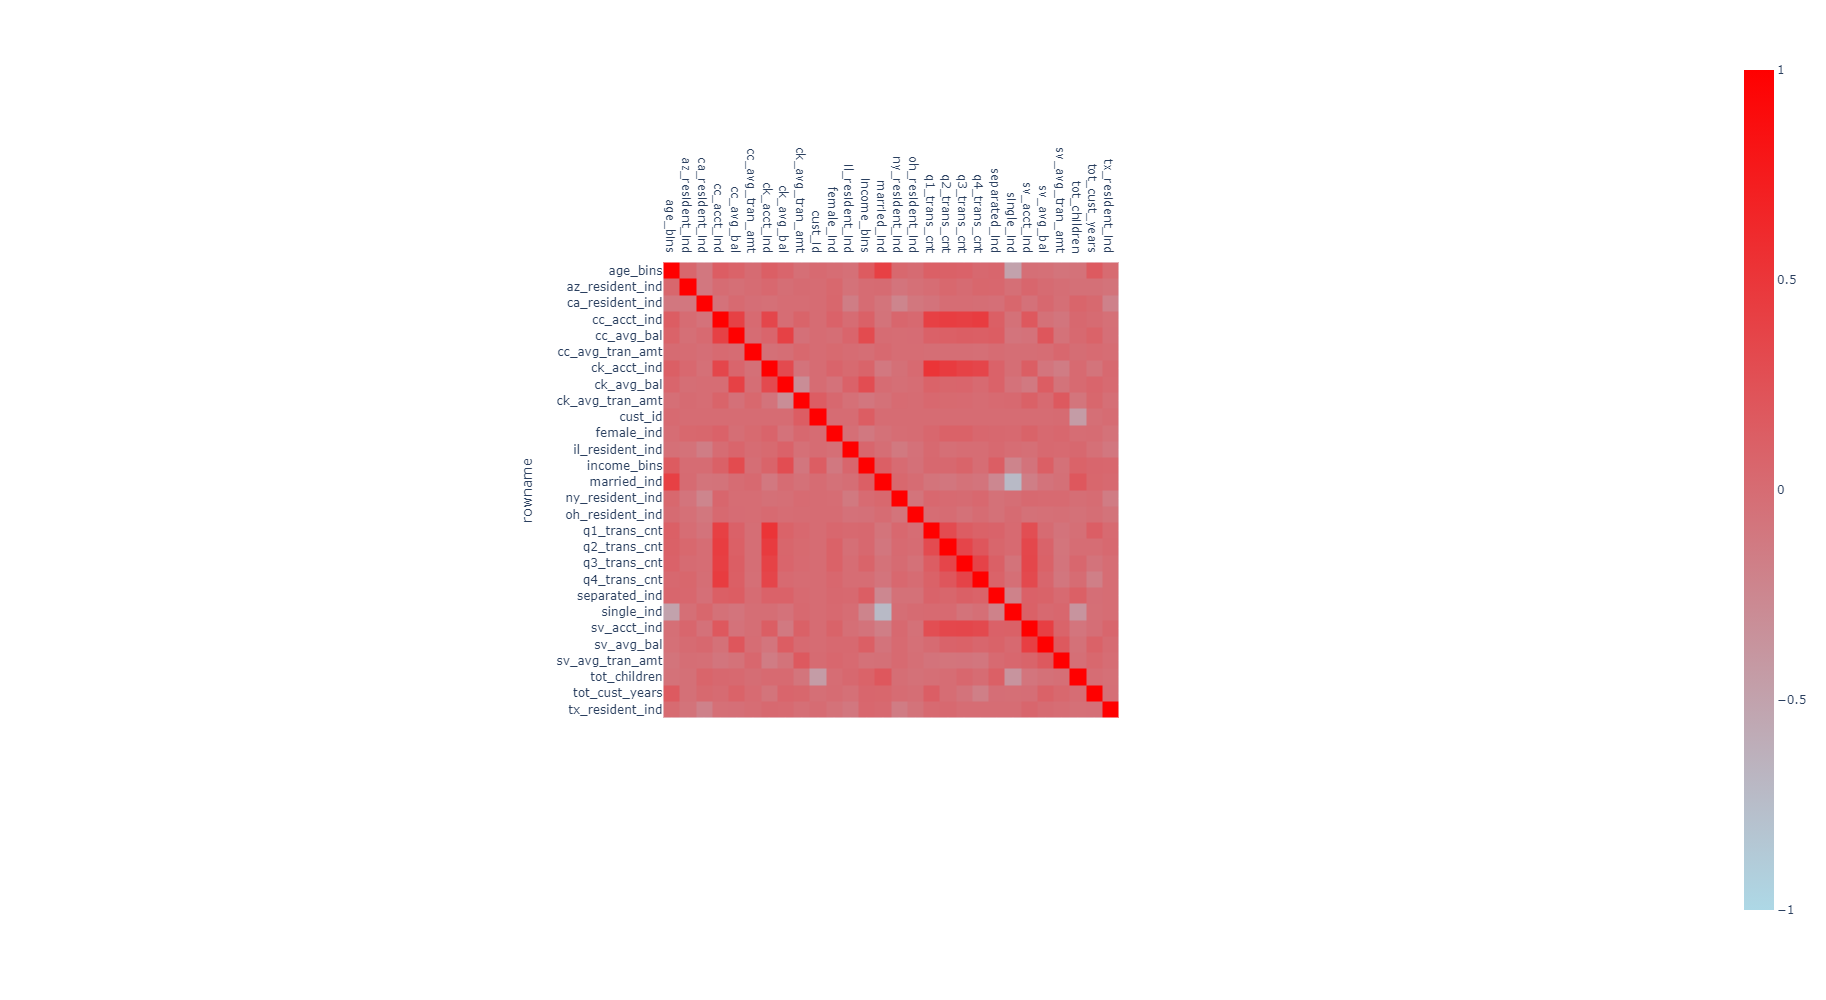

In [45]:
data = Cor_Mat.result.to_pandas().reset_index()
shaped_data = data.set_index("rowname").iloc[:,-len(data):].reindex(sorted(data.set_index("rowname").iloc[:,-len(data):]), axis=0).reindex(sorted(data.set_index("rowname").iloc[:,-len(data):]), axis=1)

fig = px.imshow(shaped_data, 
                x=shaped_data.index, 
                y=shaped_data.columns,
                color_continuous_scale=["lightblue","red"], 
                zmin=-1,
                zmax=1,
                height=1000,
               )

#z= [[np.round(float(i), 2) for i in nested] for nested in z]
fig.update_xaxes(side="top")          
fig.show()

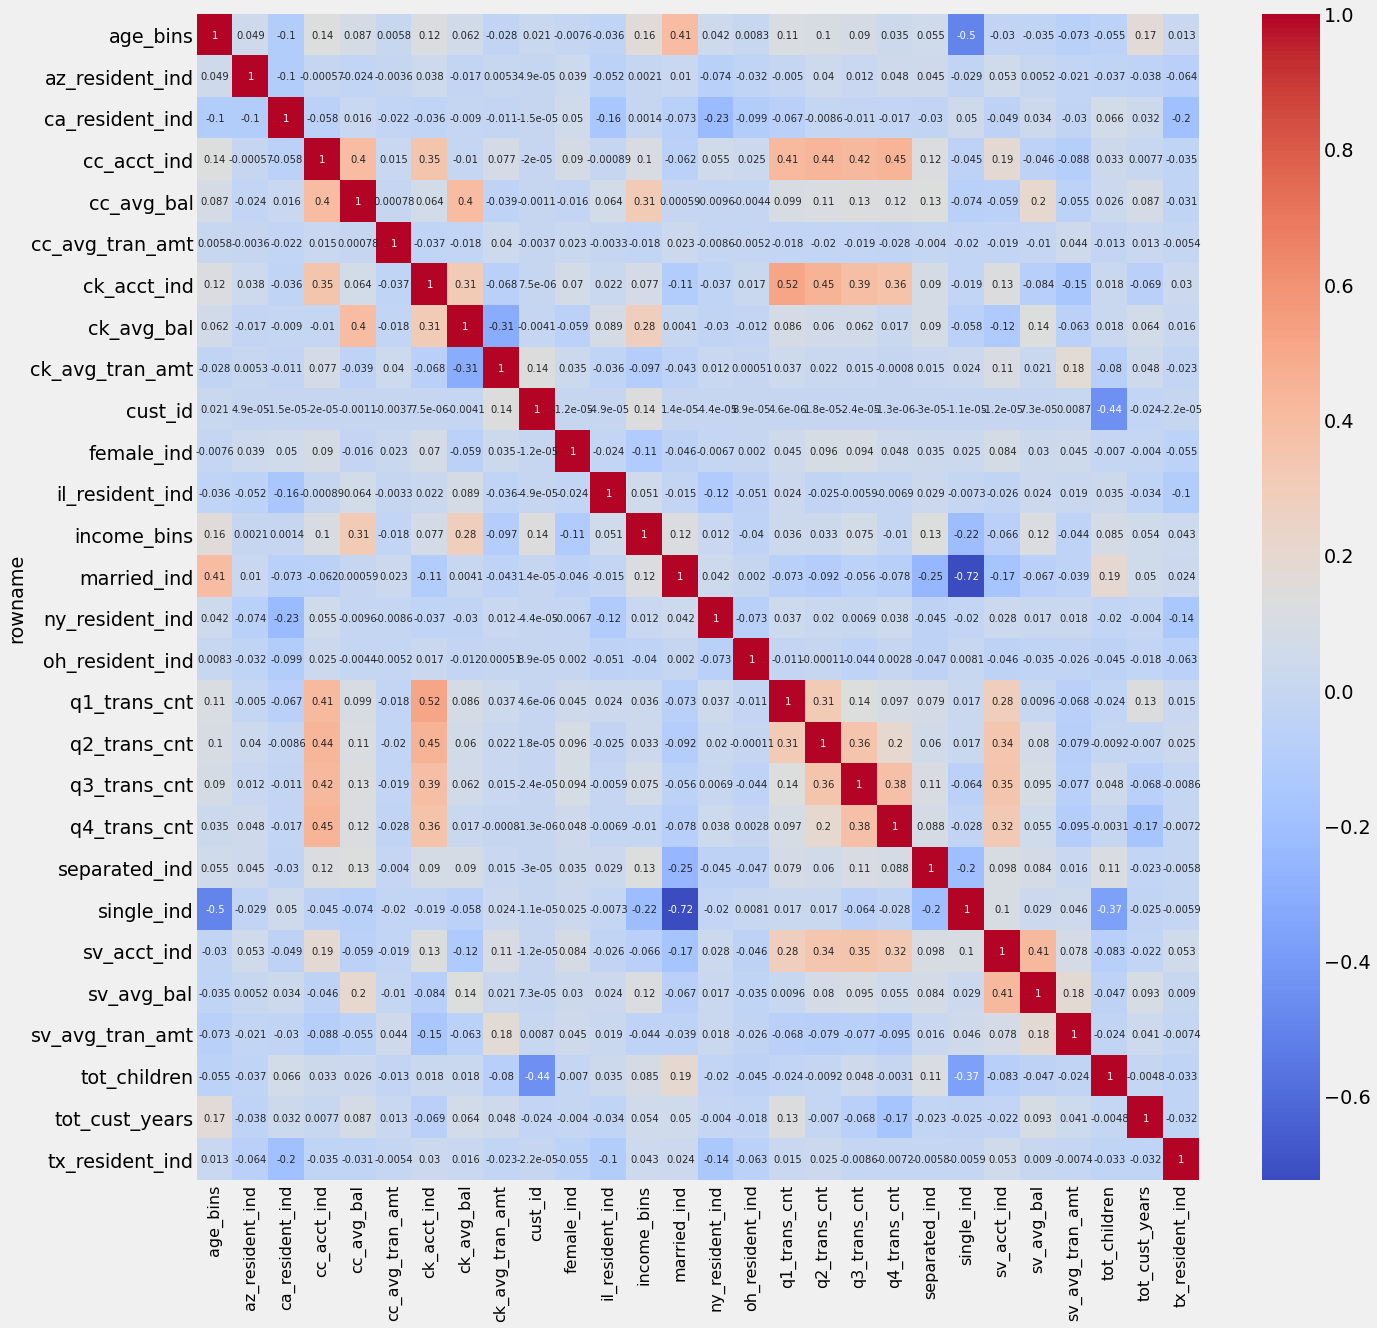

In [46]:
plt.rcParams['figure.figsize'] = (20.0, 20.0)
p = sns.heatmap(shaped_data, cmap='coolwarm', annot=True, annot_kws={'size':10})

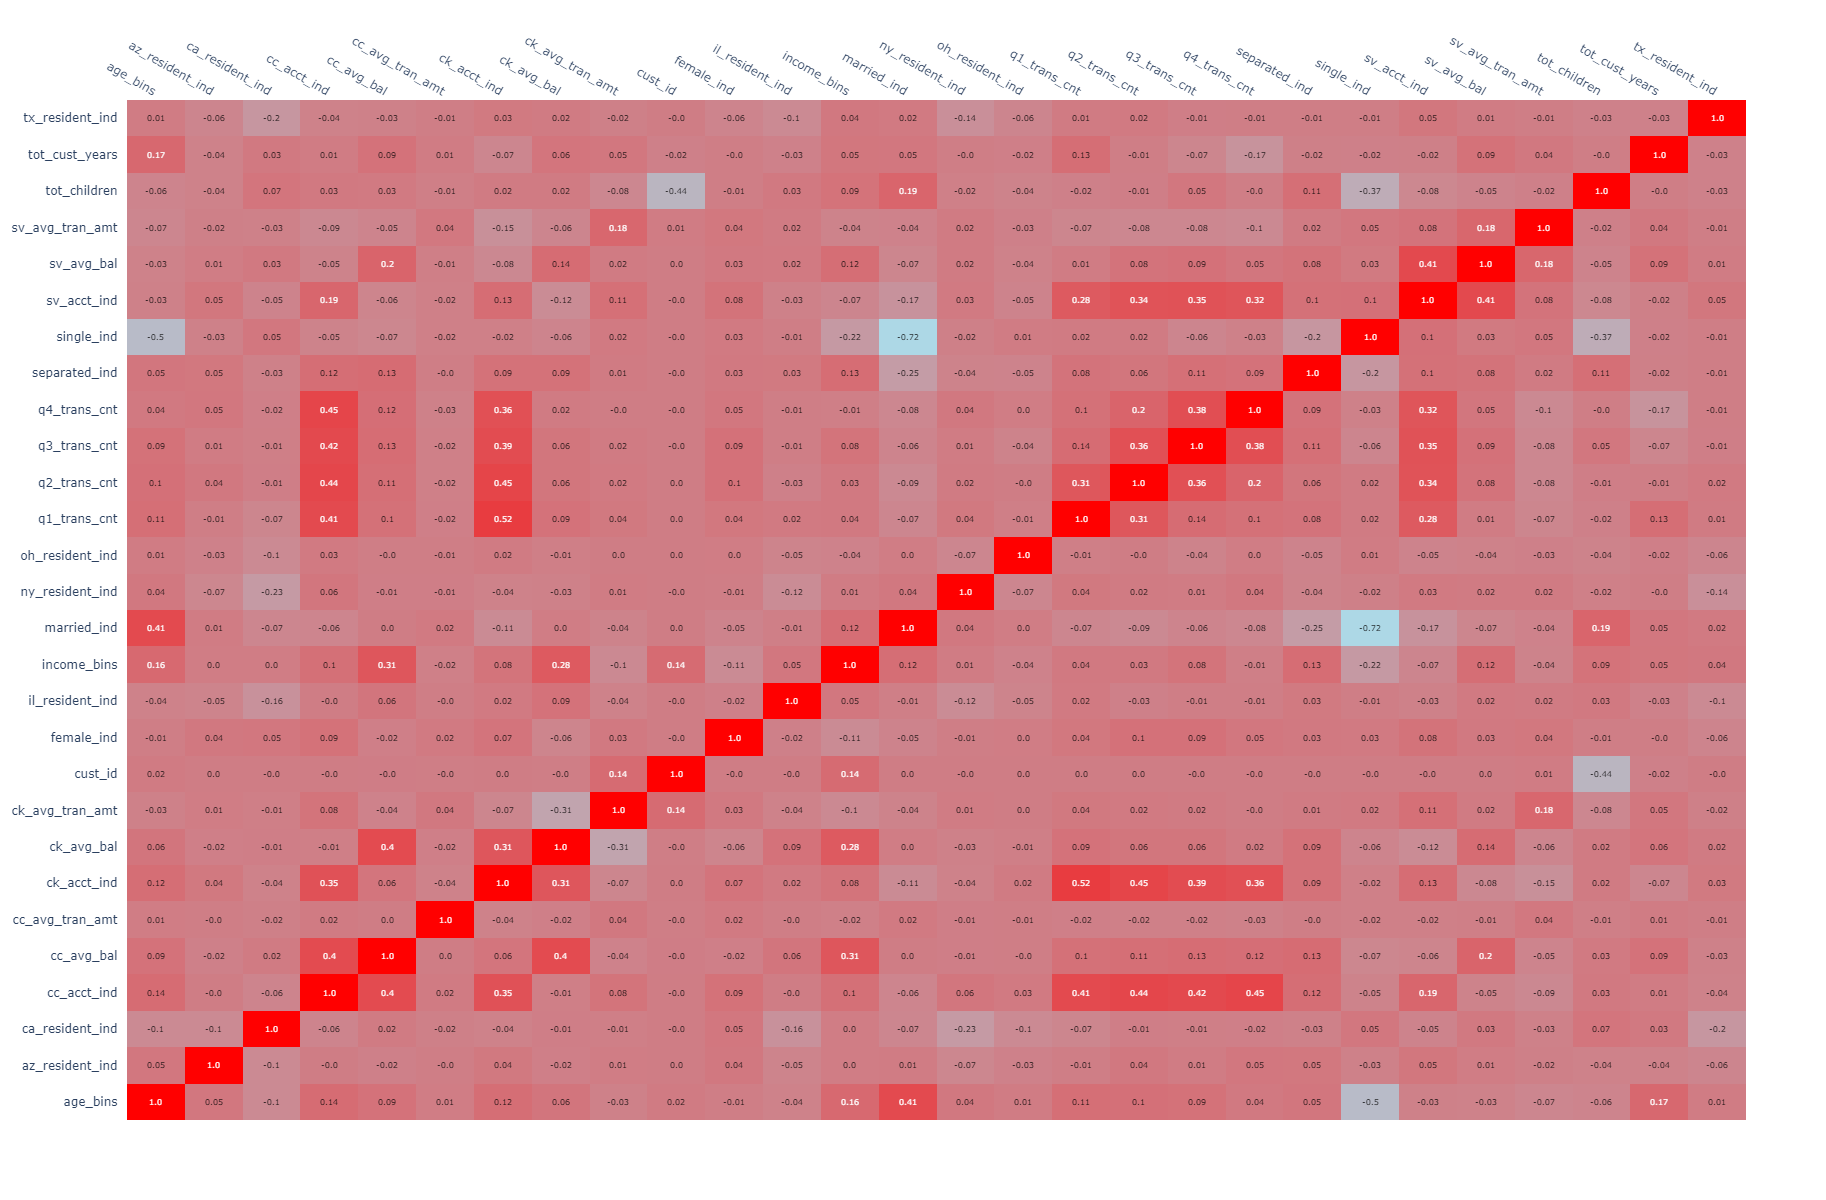

In [47]:
plt.rcParams['figure.figsize'] = (25, 10)

z = shaped_data.values
x=list(shaped_data.index)
y=list(shaped_data.columns)
z_text = [[np.round(float(i), 2) for i in nested] for nested in z]
colorscale = [[0,'lightblue'], [1, 'red']]
font_colors = ['black','white']


fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale=colorscale, font_colors=font_colors)

# Make text size smaller
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 8

fig['layout'].update(
    width=1050,
    height=1200,
    autosize=False
)
fig.show()

In [48]:
Cor_Mat = valib.Matrix(data=ADS_Py, columns='all', exclude_columns="cust_id", group_columns = "state_code", type="COR")

# Print the results.
Cor_Mat.result.to_pandas().head(30)

income_bins  age_bins  \
state_code         rownum rowname                                  
OTHER              5      female_ind         -0.086347 -0.023061   
                   21     ck_avg_tran_amt    -0.114280 -0.046158   
NY                 24     q1_trans_cnt        0.023033  0.176344   
OTHER              23     cc_avg_tran_amt    -0.024498  0.002905   
OH                 17     cc_acct_ind         0.342201  0.314006   
TX                 20     cc_avg_bal          0.229288  0.065093   
OH                 25     q2_trans_cnt        0.190227  0.310297   
                   14     oh_resident_ind     1.000000  1.000000   
OTHER              1      income_bins         1.000000  0.136156   
                   9      ca_resident_ind     1.000000  1.000000   
CA                 18     ck_avg_bal          0.228436  0.132500   
TX                 13     az_resident_ind     1.000000  1.000000   
AZ                 15     ck_acct_ind        -0.108314  0.079930   
CA                 6      single_ind         -0.298617 -0.501431   
OH                 21     ck_avg_tran_amt     0.063488  0.036064   
NY                 6      single_ind         -0.153939 -0.469176   
                   8      separated_ind      -0.012612  0.093594   
                   1      income_bins         1.000000  0.033200   
CA                 14     oh_resident_ind     1.000000  1.000000   
OTHER              12     il_resident_ind     1.000000  1.000000   
TX                 12     il_resident_ind     1.000000  1.000000   
                   27     q4_trans_cnt        0.025409 -0.055067   
                   3      tot_cust_years      0.155620  0.328721   
AZ                 27     q4_trans_cnt       -0.099457  0.323881   
                   4      tot_children        0.029047 -0.274605   
NY                 4      tot_children        0.087573 -0.144868   
OTHER              15     ck_acct_ind         0.082954  0.122901   
AZ                 26     q3_trans_cnt       -0.045415  0.150472   
TX                 16     sv_acct_ind        -0.055509 -0.004955   
OH                 4      tot_children       -0.026521 -0.062469   

                                           tot_cust_years  tot_children  \
state_code         rownum rowname                                         
OTHER              5      female_ind            -0.007455     -0.038464   
                   21     ck_avg_tran_amt        0.069804     -0.101932   
NY                 24     q1_trans_cnt           0.195745     -0.025597   
OTHER              23     cc_avg_tran_amt        0.003754     -0.014622   
OH                 17     cc_acct_ind            0.237191      0.034584   
TX                 20     cc_avg_bal             0.055172      0.032630   
OH                 25     q2_trans_cnt           0.224562     -0.079368   
                   14     oh_resident_ind        1.000000      1.000000   
OTHER              1      income_bins            0.032748      0.104305   
                   9      ca_resident_ind        1.000000      1.000000   
CA                 18     ck_avg_bal             0.109713     -0.040959   
TX                 13     az_resident_ind        1.000000      1.000000   
AZ                 15     ck_acct_ind            0.108723      0.006981   
CA                 6      single_ind             0.000869     -0.464425   
OH                 21     ck_avg_tran_amt        0.099643     -0.137459   
NY                 6      single_ind            -0.093347     -0.333613   
                   8      separated_ind         -0.026239      0.049801   
                   1      income_bins            0.115248      0.087573   
CA                 14     oh_resident_ind        1.000000      1.000000   
OTHER              12     il_resident_ind        1.000000      1.000000   
TX                 12     il_resident_ind        1.000000      1.000000   
                   27     q4_trans_cnt          -0.173238      0.029264   
                   3      tot_cust_years         1.000000      0.0

# Logistic Regression 

## LogReg() Function:

### SIGNATURE:
> valib.LogReg(data, matrix_data=None, columns=None, response_column=None, backward=None, backward_only=None, exclude_columns=None, cond_ind_threshold=30, constant=True, convergence=0.001, entrance_criterion=0.05, forward=None, forward_only=None, group_columns=None, lift_output=None, max_iter=100, mem_size=None, near_dep_report=None, remove_criterion=0.05, response_value=None, sample=None, stats_output=False, stepwise=False, success_output=False, start_threshold=None, end_threshold=None, increment_threshold=None, threshold_output=False, variance_prop_threshold=0.5)

### DESCRIPTION:
Logistic Regression is one of the most widely used types of statistical analysis. In Logistic Regression, a set of independent variables (in this case, columns) is processed to predict the value of a dependent variable (column) that assumes two values referred to as response (1) and non-response (0). The user can specify which value of the dependent variable to treat as the response, and all other values assumed by the dependent variable are treated as non-repsonse. The result is not, however, a continuous numeric variable as seen in Linear Regression, but rather a probability between 0 and 1 that the response value is assumed by the dependent variable.
There are many types of analysis that lend themselves to the use of Logistic Regression, and when scoring a model, benefit from the estimation of a probability rather than a fixed value. For example, when predicting who should be targeted for a marketing campaign, the scored customers can be ordered by the predicted probability from most to least likely, and the top n values taken from the customer list.
Some of the key features of Logistic Regression are outlined below.
- The Teradata table operator CALCMATRIX is used to build an ESSCP matrix for purposes of validating the input data, such as by checking for constant values. Also, to avoid rebuilding this matrix every time the algorithm is run, the user may run the Matrix Analysis separately, saving an ESSCP matrix in a teradataml DataFrame that can then be input to Logistic Regression. Refer "matrix_data" argument.
- One or more group by columns can optionally be specified so that an input matrix is built for each combination of group by column values, and subsequently a separate Logistic Regression model is built for each matrix. To achieve this, the names of the group by columns are passed to CALCMATRIX as parameters, so it includes them as columns in the matrix data it creates. Refer "group_columns" argument.
- The stepwise feature for Logistic Regression is a technique for selecting the independent variables in a logistic model. It consists of different methods of 'trying' variables and adding or removing them from a model through a series of forward and backward steps described in the parameter section. 
- A Statistics data is available, displaying the mean and standard deviation of each model variable. Refer to the "stats_output" argument.
- A Success data is available, displaying counts of predicted versus actual values of the dependent variable in the logistic model.
- A Multi-Threshold Success Table is available. Refer "threshold_output" argument.
- A Lift Table, such as would be used to build a Lift Chart, is available. Refer "lift_output" argument.
- A Near Dependency Report is available to identify two or more columns that may be collinear. 
- The algorithm is partially scalable because the size of each input matrix depends only on the number of independent variables (columns) and not on the size of the input data. The calculations performed on the client workstation however are not scalable when group by columns are used, because each model is built serially based on each matrix in the matrix data.

### PARAMETERS:

#### data:
Required Argument.
Specifies the input data to build a logistic regression model from.

Types: teradataml DataFrame

#### columns:
Required Argument.
Specifies the name(s) of the column(s) representing the independent variables used in building a logistic regression model. Occasionally, it can also accept permitted strings to specify all columns, or all numeric columns.
Permitted Values: 
- Name(s) of the column(s) in "data".
- Pre-defined strings: 
    - 'all' – all columns
    - 'allnumeric' – all numeric columns

Types: str OR list of Strings (str)

#### response_column:
Required Argument.
Specifies the name of the column that represents the dependent variable being predicted.

Types: str

#### backward:
Optional Argument.
Specifies whether to take backward steps or not. Backward steps, i.e., removing variables from a model, use the P-value of the T-statistic, i.e., the ratio of a B-coefficient to its standard error. The variable (column) with the largest P-value is removed if the P-value exceeds the criterion to remove.

Types: bool

#### backward_only:
Optional Argument.
Specifies whether to use only backward technique or not. This technique is similar to the backward technique, except that a forward step is not performed. It starts with all independent variables in the model. Backward steps are executed until no more are possible.

Types: bool

#### exclude_columns:
Optional Argument.
Specifies the name(s) of the column(s) to exclude from the analysis, if a column specifier such as 'all', 'allnumeric' is used in the "columns" argument. By default, when the "exclude_columns" argument is used, dependent variable and group by columns, if any, are automatically excluded as input columns and do not need to be included as "exclude_columns".

Types: str OR list of Strings (str)

#### cond_ind_threshold:
Optional Argument.
Specifies the condition index threshold value to use while generating near dependency report. This is used when "near_dep_report" is set to True.
Default Value: 30

Types: int

#### constant:
Optional Argument.
Specifies whether the logistic model includes a constant term or not. When set to True, model includes a constant term.
Default Value: True

Types: bool

#### convergence:
Optional Argument.
Specifies the convergence criterion such that the algorithm stops iterating when the change in log likelihood function falls below this value.
Default Value: 0.001

Types: float

#### entrance_criterion:
Optional Argument.
Specifies the criterion to enter a variable into the model. The W-statistic chi-square P-value must be less than this value for a variable to be added.
Default Value: 0.05

Types: float

#### forward:
Optional Argument.
Specifies whether to use forward technique or not. When set to True, in this technique, starting with no independent variables in the model, a forward step is performed, adding the "best" choice, followed by a backward step, removing the "worst" choice. Refer to the "stepwise" argument for a description of the steps in this technique.

Types: bool

#### forward_only:
Optional Argument.
Specifies whether to use only forward technique or not. This technique is similar to the forward technique, except that a backward step is not performed. 

Types: bool

#### group_columns:
Optional Argument.
Specifies the name(s) of the column(s) dividing the input into partitions, one for each combination of values in the group by columns. For each partition or combination of values a separate logistic model and XML report is built.

Types: str OR list of Strings (str)

#### lift_output:
Optional Argument.
Specifies whether to build a lift chart or not and add it in the functions output string. It splits up the computed probability values into deciles with the usual counts and percentages to demonstrate what happens when more and more rows of ordered probabilities are accumulated.

Types: bool

#### matrix_data:
Optional Argument.
Specifies the input matrix data to use for the analysis. Instead of internally building a matrix with the Matrix function each time this analysis is performed, the user may build an ESSCP Matrix once with the Matrix Analysis using Matrix() function. The matrix can subsequently be read from this data instead of re-building it each time. If this is specified, the columns specified with the "columns" argument should be a subset of the columns in this matrix and can be specified in any order. The columns must however all be present in the matrix. Further, if group by columns are specified in the matrix, these same group by columns must be specified in this analysis.

Types: teradataml DataFrame

#### max_iter:
Optional Argument.
Specifies The maximum number of attempts to converge on a solution.
Default Value: 100

Types: int

#### mem_size:
Optional Argument.
Specifies the memory size in megabytes to allocate for in-memory Logistic Regression. If there is too much data to fit in this amount of memory or is set to 0 or argument is not specified, normal SQL processing is performed. 

Types: int

#### near_dep_report:
Optional Argument.
Specifies whether to produce an XML report showing columns that may be collinear as part of the output or not. The report is included in the XML output only if collinearity is detected.
Two threshold arguments are available for this report, "cond_ind_threshold" and "variance_prop_threshold". 

Types: bool

#### remove_criterion:
Optional Argument.
Specifies the criterion to remove a variable from the model. The T-Statistic P-value must be greater than this value for a variable to be removed.
Default Value: 0.05

Types: float

#### response_value:
Optional Argument.
Specifies the value assumed by the dependent column that is to be treated as the response value.

Types: str

#### sample:
Optional Argument.
Specifies whether to use sample of the data to be read into memory for processing, if the memory size available is less than the amount of data to process. When set to True, a sample of data is read.

Types: bool

#### stats_output:
Optional Argument.
Specifies whether an optional data quality report should be delivered in the function's XML output string or not, which includes the mean and standard deviation of each model variable, derived from an ESSCP matrix.
Default Value: False

Types: bool

#### stepwise:
Optional Argument.
Specifies whether to perform a stepwise procedure or not. 
Forward steps, i.e., adding variables to a model, add the variable with the smallest chi-square P-value connected to its special W-statistic, provided the P-value is less than the criterion to enter. 
Backward steps, i.e., removing variables from a model, use the P-value of the T-statistic, i.e., the ratio of a B-coefficient to its standard error. The variable (column) with the largest P-value is removed if the P-value exceeds the criterion to remove.
Default Value: False

Types: bool

#### success_output:
Optional Argument.
Specifies whether an optional success report should be delivered in the function's XML output string or not, which includes the displaying counts of predicted versus actual values of the dependent variable of the logistic regression model. This report is similar to the Decision Tree Confusion Matrix, but the success report only includes two values of the dependent variable, namely response versus non-response.
Default Value: False

Types: bool

#### start_threshold:
Optional Argument.
Specifies the beginning threshold value utilized in the Multi-Threshold Success output.

Types: float, int

#### end_threshold:
Optional Argument.
Specifies the ending threshold value utilized in the Multi-Threshold Success output.

Types: float, int

#### increment_threshold:
Optional Argument.
Specifies the difference in threshold values between adjacent rows in the Multi-Threshold Success output.

Types: float, int

#### threshold_output:
Optional Argument.
Specifies whether the Multi-Threshold Success output should be produced or not and included in the XML output string in the result. This report can be thought of as a table where each row is a Prediction Success Table, and each row has a different threshold value as generated by the "start_threshold", "end_threshold", and "increment_threshold" arguments. What is meant by a threshold here is the value above which the predicted probability indicates a response.
Default Value: False

Types: bool

#### variance_prop_threshold:
Optional Argument.
Specifies the variance proportion threshold value to use while generating near dependency report. This is used when "near_dep_report" is set to True.
Default Value: 0.5

Types: float

### RETURNS:
An instance of LogReg.
Output teradataml DataFrames can be accessed using attribute references, such as LogRegObj.<attribute_name>.
Output teradataml DataFrame attribute names are:
1. model
2. statistical_measures
3. xml_reports

### RAISES:
TeradataMlException, TypeError, ValueError

1.  Using the ADS_Py table, lets build a logistic regression model to predict the customer bases propensity to open a credit card account (cc_acct_ind) based upon all non-credit card variables in the analytic data set.  The model coefficients and variable statistics are created within the model and statistical_measure objects.  The reports for the success table, threshold table and lift table are returned in an XML string within the xml_reports object.

In [21]:
Logit_Model = valib.LogReg(data=ADS_Py, 
                           columns='all', 
                           exclude_columns="cust_id, state_code, cc_avg_tran_amt, cc_avg_bal",
                           response_column="cc_acct_ind", 
                           response_value=1,
                           threshold_output='true',
                           near_dep_report='true', 
                           cond_ind_threshold=25,
                           variance_prop_threshold=0.5)

# Print the results using pandas for readability

In [22]:
Logit_Model.model.to_pandas().head(30)

B Coefficient  Standard Error  Wald Statistic  T Statistic  \
Column Name                                                                   
ck_avg_tran_amt       0.076684        0.023529       10.622234     3.259177   
tx_resident_ind      -0.284051        0.598922        0.224932    -0.474270   
oh_resident_ind       1.353802        1.108852        1.490607     1.220904   
married_ind           0.465076        0.606122        0.588745     0.767297   
tot_cust_years        0.043920        0.072499        0.366992     0.605799   
(Constant)            0.160356        1.040047        0.023772     0.154181   
single_ind            0.971796        0.743255        1.709519     1.307486   
sv_avg_tran_amt       0.005993        0.011931        0.252318     0.502313   
q2_trans_cnt          0.037545        0.006269       35.865993     5.988822   
ca_resident_ind      -0.648180        0.452104        2.055488    -1.433697   
separated_ind         1.308483        0.963412        1.844641     1.358176   
sv_avg_bal           -0.000688        0.000231        8.844242    -2.973927   
q3_trans_cnt          0.038669        0.006257       38.200649     6.180667   
q4_trans_cnt          0.052369        0.006436       66.216752     8.137368   
tot_children          0.107509        0.207535        0.268356     0.518031   
income_bins           0.032730        0.013072        6.269432     2.503883   
age_bins              0.096619        0.094477        1.045867     1.022677   
ck_avg_bal            0.000130        0.000229        0.323887     0.569110   
az_resident_ind      -0.663952        0.989888        0.449885    -0.670734   
female_ind            0.100765        0.354466        0.080812     0.284274   
sv_acct_ind          -3.651756        0.570448       40.979909    -6.401555   
ck_acct_ind          -6.491468        0.796589       66.407456    -8.149077   
il_resident_ind       0.384951        0.665827        0.334263     0.578155   
q1_trans_cnt          0.024005        0.003311       52.575768     7.250915   
ny_resident_ind      -0.137612        0.564635        0.059399    -0.243718   

                      P-Value  Odds Ratio     Lower      Upper  Partial R  \
Column Name                                                                 
ck_avg_tran_amt  1.176632e-03    1.079701  1.031041   1.130657   0.103290   
tx_resident_ind  6.354694e-01    0.752728  0.232721   2.434679   0.000000   
oh_resident_ind  2.225726e-01    3.872120  0.440648  34.025573   0.000000   
married_ind      4.431882e-01    1.592135  0.485342   5.222902   0.000000   
tot_cust_years   5.448636e-01    1.044898  0.906490   1.204439   0.000000   
(Constant)       8.775155e-01         NaN       NaN        NaN        NaN   
single_ind       1.915180e-01    2.642685  0.615723  11.342412   0.000000   
sv_avg_tran_amt  6.156205e-01    1.006011  0.982759   1.029813   0.000000   
q2_trans_cnt     3.527563e-09    1.038258  1.025579   1.051094   0.204706   
ca_resident_ind  1.521478e-01    0.522997  0.215609   1.268617  -0.008286   
separated_ind    1.748873e-01    3.700555  0.560027  24.452589   0.000000   
sv_avg_bal       3.050972e-03    0.999312  0.998860   0.999766  -0.092026   
q3_trans_cnt     1.137607e-09    1.039427  1.026759   1.052251   0.211645   
q4_trans_cnt     2.220446e-15    1.053764  1.040556   1.067140   0.281886   
tot_children     6.046161e-01    1.113501  0.741373   1.672417   0.000000   
income_bins      1.253204e-02    1.033272  1.007135   1.060087   0.072683   
age_bins         3.068478e-01    1.101441  0.915255   1.325501   0.000000   
ck_avg_bal       5.694813e-01    1.000130  0.999682   1.000579   0.000000   
az_resident_ind  5.026321e-01    0.514813  0.073970   3.582973   0.000000   
female_ind       7.762926e-01    1.106017  0.552129   2.215560   0.000000   
sv_acct_ind      2.978644e-10    0.025946  0.008482   0.079365  -0.219619   
ck_acct_ind      1.935392e-15    0.001516  0.000318   0.007225  -0.282304   
il_resident_ind  5.633634e-01    1.

In [24]:
Logit_Model.statistical_measures.to_pandas().head(30)

Total Observations  Total Iterations  Initial Log Likelihood  \
rid                                                                 
1                 664.0               8.0             -404.084085   

     Final Log Likelihood  Likelihood Ratio Test G Statistic  \
rid                                                            
1             -119.026691                         570.114789   

     Chi-Square Degrees of Freedom  Chi-Square Value  Chi-Square Probability  \
rid                                                                            
1                             24.0         36.415029                     0.0   

     McFaddens Pseudo R-Squared Dependent Variable  Dependent Response Value  \
rid                                                                            
1                      0.705441        cc_acct_ind                       1.0   

     Total Distinct Values  
rid                         
1                      2.0

Currently, teradataml 17.0.0.3 does not support the VAL 2.0.0.3 'report' function in td_analyze.  Until that time, we need to reach out and execute a SQL statement to convert the XML reports to HTML for display purposes.  The following block of code does just that:

In [23]:
from IPython.core.display import display, HTML

cursor=td_context.raw_connection().cursor()
parms = 'database=' + Logit_Model.xml_reports._table_name.split('.')[0] + ';tablename=' + Logit_Model.xml_reports._table_name.split('.')[1] + ';analysistype=logistic'
cursor.callproc("VAL.td_analyze", ['report',parms])
cursor.nextset()
z=cursor.fetchall()
# Loop in case of group by generating multiple reports
for i in range(len(z)):
    display(HTML(z[i][1]))

OperationalError: [Version 17.10.0.1] [Session 11924] [Teradata Database] [Error 7825] in UDF/XSP/UDM VAL.td_analyze: SQLSTATE 38U01: 'report' is not a valid function name
 at gosqldriver/teradatasql.(*teradataConnection).formatDatabaseError TeradataConnection.go:1139
 at gosqldriver/teradatasql.(*teradataConnection).makeChainedDatabaseError TeradataConnection.go:1155
 at gosqldriver/teradatasql.(*teradataConnection).processErrorParcel TeradataConnection.go:1218
 at gosqldriver/teradatasql.(*TeradataRows).processResponseBundle TeradataRows.go:1807
 at gosqldriver/teradatasql.(*TeradataRows).executeSQLRequest TeradataRows.go:640
 at gosqldriver/teradatasql.newTeradataRows TeradataRows.go:491
 at gosqldriver/teradatasql.(*teradataStatement).QueryContext TeradataStatement.go:122
 at gosqldriver/teradatasql.(*teradataConnection).QueryContext TeradataConnection.go:2091
 at database/sql.ctxDriverQuery ctxutil.go:48
 at database/sql.(*DB).queryDC.func1 sql.go:1579
 at database/sql.withLock sql.go:3204
 at database/sql.(*DB).queryDC sql.go:1574
 at database/sql.(*Conn).QueryContext sql.go:1823
 at main.goCreateRows goside.go:653
 at main._cgoexpwrap_f32e4f327ea8_goCreateRows _cgo_gotypes.go:363
 at runtime.cgocallbackg1 cgocall.go:332
 at runtime.cgocallbackg cgocall.go:207
 at runtime.cgocallback_gofunc asm_amd64.s:793
 at runtime.goexit asm_amd64.s:1373

2.  Using the same table, lets build a logistic regression model to predict the customer bases propensity to open a credit card account (cc_acct_ind), by state,  based upon all non-credit card variables in the analytic data set.  This type of micro-modelling is done using the groupby option.  The model coefficients and variable statistics are created within the model and statistical_measure objects.  The reports for the success table, threshold table and lift table are returned in an XML string within the xml_reports object.

In [25]:
Logit_Model2 = valib.LogReg(data=ADS_Py, 
                            columns='all', 
                            exclude_columns="cust_id, az_resident_ind, il_resident_ind, oh_resident_ind, tx_resident_ind, ny_resident_ind, ca_resident_ind, cc_avg_tran_amt, cc_avg_bal",
                            response_column="cc_acct_ind", 
                            response_value=1,
                            threshold_output='true',
                            near_dep_report='true', 
                            cond_ind_threshold=25,
                            variance_prop_threshold=0.5,
                            group_columns="state_code")

# Print the results using pandas for readability

In [26]:
Logit_Model2.model.to_pandas().head(30)

B Coefficient  Standard Error  \
state_code         Column Name                                      
CA                 single_ind           -1.837471     6093.193229   
AZ                 single_ind           -3.487010     1111.840131   
NY                 (Constant)          -31.177342     4955.451908   
                   tot_children          9.782149      884.225973   
TX                 married_ind          -4.506716    15390.888400   
AZ                 age_bins             -0.267294      109.033798   
NY                 q4_trans_cnt          0.513817        9.713082   
AZ                 q4_trans_cnt          0.133240        2.980593   
CA                 married_ind          12.257925     5614.363240   
                   sv_avg_bal           -0.015479        3.398608   
                   age_bins              5.555024      480.216187   
IL                 ck_avg_tran_amt       0.383461       33.097392   
TX                 q2_trans_cnt          0.097907        4.219153   
AZ                 q3_trans_cnt          0.151326        9.152688   
TX                 sv_acct_ind         -51.335868     4079.174491   
AZ                 income_bins          -0.590655       39.498009   
OTHER              income_bins           0.045269        0.026688   
NY                 ck_avg_tran_amt       2.603816       77.882295   
OTHER              q3_trans_cnt          0.061525        0.022703   
AZ                 (Constant)            8.564362     1221.125573   
OTHER              sv_avg_bal           -0.000467        0.000409   
AZ                 q2_trans_cnt          0.042451        4.436386   
OTHER              tot_cust_years        0.171590        0.118383   
                   q2_trans_cnt          0.029430        0.012537   
TX                 ck_avg_tran_amt       4.428947      102.129412   
IL                 married_ind           5.911033      976.908774   
NY                 sv_acct_ind         -35.037174     1774.268642   
OTHER              age_bins              0.170869        0.148706   
                   sv_acct_ind          -3.811493        0.976251   
CA                 q3_trans_cnt          0.722533       26.588373   

                                    Wald Statistic  T Statistic   P-Value  \
state_code         Column Name                                              
CA                 single_ind         9.093920e-08    -0.000302  0.999760   
AZ                 single_ind         9.836071e-06    -0.003136  0.997695   
NY                 (Constant)         3.958327e-05    -0.006292  0.994996   
                   tot_children       1.223889e-04     0.011063  0.991202   
TX                 married_ind        8.574187e-08    -0.000293  0.999767   
AZ                 age_bins           6.009739e-06    -0.002451  0.998198   
NY                 q4_trans_cnt       2.798355e-03     0.052899  0.957949   
AZ                 q4_trans_cnt       1.998307e-03     0.044702  0.967154   
CA                 married_ind        4.766866e-06     0.002183  0.998261   
                   sv_avg_bal         2.074340e-05    -0.004554  0.996373   
                   age_bins           1.338130e-04     0.011568  0.990787   
IL                 ck_avg_tran_amt    1.342319e-04     0.011586  0.990828   
TX                 q2_trans_cnt       5.384935e-04     0.023205  0.981569   
AZ                 q3_trans_cnt       2.733576e-04     0.016534  0.987847   
TX                 sv_acct_ind        1.583789e-04    -0.012585  0.990004   
AZ                 income_bins        2.236232e-04    -0.014954  0.989008   
OTHER              income_bins        2.877179e+00     1.696225  0.091239   
NY                 ck_avg_tran_amt    1.117746e-03     0.033433  0.973416   
OTHER              q3_trans_cnt       7.344251e+00     2.710028  0.007251   
AZ                 (Constant)         4.918915e-05     0.007013  0.994844   
OTHER              sv_avg_bal         1.300040e+00    -1.140193  0.255429   
AZ                 q2_trans_cnt       9.156211e-05     0

In [27]:
Logit_Model2.statistical_measures.to_pandas().head(30)

state_code  Total Observations  Total Iterations  \
rid                                                             
5    OH                                23.0               NaN   
7    TX                                75.0              15.0   
6    OTHER                            242.0               8.0   
3    IL                                51.0              14.0   
4    NY                                96.0              15.0   
1    AZ                                22.0              11.0   
2    CA                               159.0              17.0   

     Initial Log Likelihood  Final Log Likelihood  \
rid                                                 
5                       NaN                   NaN   
7                -49.006365             -0.000251   
6               -141.121286            -44.809337   
3                -31.724506             -0.000278   
4                -51.673676             -0.000285   
1                -13.760810             -0.000373   
2               -103.754619             -0.000299   

     Likelihood Ratio Test G Statistic  Chi-Square Degrees of Freedom  \
rid                                                                     
5                                  NaN                            NaN   
7                            98.012227                           18.0   
6                           192.623899                           18.0   
3                            63.448456                           18.0   
4                           103.346780                           18.0   
1                            27.520875                           18.0   
2                           207.508639                           18.0   

     Chi-Square Value  Chi-Square Probability  McFaddens Pseudo R-Squared  \
rid                                                                         
5                 NaN                     NaN                         NaN   
7           28.869299            5.114797e-13                    0.999995   
6           28.869299            0.000000e+00                    0.682476   
3           28.869299            5.605311e-07                    0.999991   
4           28.869299            5.373479e-14                    0.999994   
1           28.869299            6.973076e-02                    0.999973   
2           28.869299            0.000000e+00                    0.999997   

    Dependent Variable  Dependent Response Value  Total Distinct Values  
rid                                                                      
5                 None                       NaN                    NaN  
7          cc_acct_ind                       1.0                    2.0  
6          cc_acct_ind                       1.0                    2.0  
3          cc_acct_ind                       1.0                    2.0  
4          cc_acct_ind                       1.0                    2.0  
1          cc_acct_ind                       1.0                    2.0  
2          cc_acct_ind                       1.0                    2.0

Currently, teradataml 17.0.0.3 does not support the VAL 2.0.0.3 'report' function in td_analyze.  Until that time, we need to reach out and execute a SQL statement to convert the XML reports to HTML for display purposes.  The following block of code does just that:

In [118]:
from IPython.core.display import display, HTML

cursor=td_context.raw_connection().cursor()
parms = 'database=' + Logit_Model2.xml_reports._table_name.split('.')[0] + ';tablename=' + Logit_Model2.xml_reports._table_name.split('.')[1] + ';analysistype=logistic'
cursor.callproc("VAL.td_analyze", ['report',parms])
cursor.nextset()
z=cursor.fetchall()
# Loop in case of group by generating multiple reports
for i in range(len(z)):
    display(HTML(z[i][1]))

# Logistic Regression Evaluation

## LogRegEvaluator() Function:

### SIGNATURE:
>valib.LogRegEvaluator(data, model, estimate_column=None, index_columns=None, prob_column=None, accumulate=None, prob_threshold=0.5, start_threshold=None, end_threshold=None, increment_threshold=None)

### DESCRIPTION:
Logistic Regression function model can be passed to this function to generate evaluation reports. Function produces the result containing the following reports in XML format:
- Success result – This output is delivered in the function's XML output string, displaying counts of predicted versus actual values of the dependent variable of the logistic regression model. This report is similar to the Decision Tree Confusion Matrix, but the Success output only includes two values of the dependent variable, namely response versus non-response.
- Multi-Threshold Success result - This output is delivered in the function's XML output string. Report can be thought of as a table where each row is a Prediction Success Output, and each row has a different threshold value as generated by the "start_threshold", "end_threshold", and "increment_threshold" arguments. What is meant by a threshold here is the value above which the predicted probability indicates a response.
- Lift result – Result containing information, such as would be required to build a lift chart is available. It splits up the computed probability values into deciles with the usual counts and percentages to demonstrate what happens when more and more rows of ordered probabilities are accumulated. It is delivered in the function's XML output string.

### PARAMETERS:

#### data:
Required Argument.
Specifies the input data to evaluate.

Types: teradataml DataFrame

#### model:
Required Argument.
Specifies the input containing the logistic model to use in scoring. This must be the "model" teradataml DataFrame generated by LogReg() function from VALIB or a teradataml DataFrame created on a table generated by 'logistic' function from Vantage Analytic Library.

Types: teradataml DataFrame

#### estimate_column:
Required Argument.
Specifies the name of a column in the score output containing the estimated value of the dependent variable (column).
Notes:
    1. Either "estimate_column" or "prob_column" must be requested.
    2. If the estimate column is not unique in the score output, '_tm_' is automatically placed in front of the name.

Types: str

#### index_columns:
Optional Argument.
Specifies the name(s) of the column(s) representing the primary index of the score output. By default, the primary index columns of the score output are the primary index columns of the input. In addition, the index columns need to form a unique key for the score output. Otherwise, there are more than one score for a given observation.

Types: str OR list of Strings (str)

#### prob_column:
Optional Argument.
Specifies the name of a column in the score output containing the probability that the dependent value is equal to the response value.
Notes:
    1. Either "estimate_column" or "prob_column" must be requested.
    2. If the probability column is not unique in the score output, '_tm_' is automatically placed in front of the name.

Types: str

#### accumulate:
Optional Argument.
Specifies the name(s) of the column(s) from the input to retain in the output. 

Types: str OR list of Strings (str)

#### prob_threshold:
Optional Argument.
Specifies the probability threshold value. When the probability of the dependent variable being 1 is greater than or equal to this value, the estimated value of the dependent variable is 1. If less than this value, the estimated value is 0.
Default Value: 0.5

Types: float, int

#### start_threshold:
Optional Argument.
Specifies the beginning threshold value utilized in the Multi-Threshold Success output.

Types: float, int

#### end_threshold:
Optional Argument.
Specifies the ending threshold value utilized in the Multi-Threshold Success output.

Types: float, int

#### increment_threshold:
Optional Argument.
Specifies the difference in threshold values between adjacent rows in the Multi-Threshold Success output.

Types: float, int

### RETURNS:
An instance of LogRegEvaluator.
Output teradataml DataFrames can be accessed using attribute references, such as LogRegEvaluatorObj.<attribute_name>.
Output teradataml DataFrame attribute name is: result

### RAISES:
TeradataMlException, TypeError, ValueError

3. Evaluate the logistic regression model - note that this option is not available when the group by option is used.

In [28]:
Logit_Model_Eval = valib.LogRegEvaluator(data=ADS_Py, 
                                         model=Logit_Model.model, 
                                         index_columns="cust_id",
                                         prob_column="Probability")

In [29]:
Logit_Model_Eval.result.to_pandas().head(20)

XmlModel
partId                                                   
1       <?xml version="1.0" encoding="UTF-8" standalon...

In [132]:
from IPython.core.display import display, HTML

cursor=td_context.raw_connection().cursor()
parms = 'database=' + Logit_Model_Eval.result._table_name.split('.')[0] + ';tablename=' + Logit_Model_Eval.result._table_name.split('.')[1] + ';analysistype=logisticscore'
cursor.callproc("VAL.td_analyze", ['report',parms])
cursor.nextset()
z=cursor.fetchall()
# Loop in case of group by generating multiple reports
for i in range(len(z)):
    display(HTML(z[i][1]))

# Logistic Regression Scoring

## LogRegPredict() Function:

### SIGNATURE:
> valib.LogRegPredict(data, model, estimate_column=None, index_columns=None, prob_column=None, accumulate=None, prob_threshold=0.5)

### DESCRIPTION:
Logistic Regression function model can be passed to a Logistic Regression Scoring function to create a score output containing predicted values of the dependent variable. 

### PARAMETERS:

#### data:
Required Argument.
Specifies the input data to score.

Types: teradataml DataFrame

#### model:
Required Argument.
Specifies the input containing the logistic model to use in scoring. This must be the "model" teradataml DataFrame generated by LogReg() function from VALIB or a teradataml DataFrame created on a table generated by 'logistic' function from Vantage Analytic Library.

Types: teradataml DataFrame

#### estimate_column:
Required Argument.
Specifies the name of a column in the score output containing the estimated value of the dependent variable (column).
Notes:
    1. Either "estimate_column" or "prob_column" must be requested.
    2. If the estimate column is not unique in the score output, '_tm_' is automatically placed in front of the name.

Types: str

#### index_columns:
Optional Argument.
Specifies the name(s) of the column(s) representing the primary index of the score output. By default, the primary index columns of the score output are the primary index columns of the input. In addition, the index columns need to form a unique key for the score output. Otherwise, there are more than one score for a given observation.

Types: str OR list of Strings (str)

#### prob_column:
Optional Argument.
Specifies the name of a column in the score output containing the probability that the dependent value is equal to the response value.
Notes:
    1. Either "estimate_column" or "prob_column" must be requested.
    2. If the probability column is not unique in the score output, '_tm_' is automatically placed in front of the name.

Types: str

#### accumulate:
Optional Argument.
Specifies the name(s) of the column(s) from the input to retain in the output. 

Types: str OR list of Strings (str)

#### prob_threshold:
Optional Argument.
Specifies the probability threshold value. When the probability of the dependent variable being 1 is greater than or equal to this value, the estimated value of the dependent variable is 1. If less than this value, the estimated value is 0.
Default Value: 0.5
Types: float, int

### RETURNS:
An instance of LogRegPredict.
Output teradataml DataFrames can be accessed using attribute references, such as LogRegPredictObj.<attribute_name>.
Output teradataml DataFrame attribute name is: result

### RAISES:
TeradataMlException, TypeError, ValueError

4. Score the Logistic Regression Models

In [30]:
Logit_Model_Score = valib.LogRegPredict(data=ADS_Py, 
                                        model=Logit_Model.model, 
                                        index_columns="cust_id",
                                        estimate_column="cc_acct_ind",
                                        prob_column="Probability")
 
# Print the results using pandas for readability

Logit_Model_Score.result.to_pandas().head(20)

Probability  cc_acct_ind
cust_id                          
1363160     0.999003          1.0
1363078     1.000000          1.0
1362609     0.998306          1.0
1362548     0.996846          1.0
1362487     0.876007          1.0
1363158     0.908212          1.0
1363343     0.070846          0.0
1363200     0.999931          1.0
1362588     0.999844          1.0
1362752     0.997178          1.0
1363015     0.471195          0.0
1362670     0.010672          0.0
1363465     0.010244          0.0
1363057     0.983366          1.0
1363017     0.999199          1.0
1362607     0.996915          1.0
1363404     0.995327          1.0
1362649     0.996847          1.0
1362853     0.999943          1.0
1363486     0.984258          1.0

In [134]:
Logit_Model_Score2 = valib.LogRegPredict(data=ADS_Py, 
                                         model=Logit_Model2.model, 
                                         index_columns="cust_id",
                                         estimate_column="cc_acct_ind",
                                         prob_column="Probability")
 
# Print the results using pandas for readability

Logit_Model_Score2.result.to_pandas().head(20)

state_code   Probability  cc_acct_ind
cust_id                                                
28617834  CA                  1.000000e+00          1.0
21803664  NY                  5.318022e-02          0.0
31346907  IL                  9.999999e-01          1.0
25897836  OTHER               9.658966e-01          1.0
27258100  CA                  1.000000e+00          1.0
13633310  OTHER               9.991687e-01          1.0
19085542  IL                  9.999331e-01          1.0
28623294  NY                  5.117648e-11          0.0
13625520  CA                  9.998416e-01          1.0
31352657  OTHER               7.600511e-01          1.0
29984416  NY                  1.000000e+00          1.0
19086522  OTHER               9.977306e-01          1.0
28627536  NY                  1.000000e+00          1.0
25899527  OTHER               3.794949e-01          0.0
14987555  CA                  1.103803e-01          0.0
31358062  CA                  9.952635e-01          1.0
29996692  OTHER               9.881450e-01          1.0
29976386  IL                  9.680107e-01          1.0
28626297  TX                  1.712150e-02          0.0
28617792  CA                  9.999982e-01          1.0
28629111  TX                  1.000000e+00          1.0
14987885  NY                  1.000000e+00          1.0
16352820  OTHER               9.999999e-01          1.0
16352412  CA                  9.606196e-02          0.0
28624764  OTHER               9.996391e-01          1.0
17723810  NY                  1.000000e+00          1.0
20444685  IL                  1.154314e-02          0.0
17715204  NY                  1.000000e+00          1.0
27263280  NY                  1.000000e+00          1.0
21814960  OTHER               9.796278e-01          1.0

## End of session

In [136]:
# Remove the context of present teradataml session and terminate the Python session.
# It is recommended to call the remove_context() function for session cleanup.
# Temporary objects are removed at the end of the session.

from teradataml import remove_context
remove_context()

True

<footer style="padding:10px;background:#f9f9f9;border-bottom:3px solid #394851">©2021 Teradata. All Rights Reserved</footer>